# CSV generation 

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Government debt sustainability data generation

In [4]:
generated_csv_store_path = "data/fiscal"
if not os.path.exists(generated_csv_store_path):
    os.mkdir(generated_csv_store_path)

In [5]:
gov_debt_sus_list = ['ggdy', 'pby', 'fby', 'dfggd', 'dffb', 'ggdma', 'fbma']

In [ ]:
# for sheets in gov_debt_sus_list:
#     df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
#     missing_percentage = df.isnull().mean() * 100
#     plt.figure(figsize=(14, 4))
#     missing_percentage.plot(kind='bar', color='skyblue')
#     plt.title('Percentage of Missing Values by Column')
#     plt.xlabel(sheets)
#     plt.ylabel('Percentage of Missing Values')
#     plt.xticks(rotation=45)
#     plt.show()

In [7]:
non_year_column = ['Country']
year_column = [str(year) for year in range(2000, 2024)]

df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name="ggdy")
base_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name="ggdy")

for sheets in gov_debt_sus_list[1:]:
    df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
    tmp_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name=sheets)
    column_to_move = tmp_df.pop(sheets)
    base_df[sheets] = column_to_move
    
base_df.to_csv(f"{generated_csv_store_path}/gov_debt_sus.csv", index=False)

## Balance sheet composition generation

In [8]:
balance_sheet_comp_list = ['fxsovsh', 'secnres', 'fordebtsh', 'concggd', 'avglife', 'debtduey']


In [9]:
# for sheets in balance_sheet_comp_list:
#     df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
#     missing_percentage = df.isnull().mean() * 100
#     plt.figure(figsize=(14, 4))
#     missing_percentage.plot(kind='bar', color='skyblue')
#     plt.title('Percentage of Missing Values by Column')
#     plt.xlabel(sheets)
#     plt.ylabel('Percentage of Missing Values')
#     plt.xticks(rotation=45)
#     plt.show()

In [10]:
non_year_column = ['Country']
year_column = [str(year) for year in range(2000, 2024)]

df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name="fxsovsh")
base_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name="fxsovsh")

for sheets in balance_sheet_comp_list[1:]:
    df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
    tmp_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name=sheets)
    column_to_move = tmp_df.pop(sheets)
    base_df[sheets] = column_to_move
    
base_df.to_csv(f"{generated_csv_store_path}/balance_sheet_comp.csv", index=False)

## External and private sector debt Generation

In [11]:
private_sec_debt_list = ['xtdebty', 'fxdebtall', 'prdebty', 'pscy', 'stdebtall', 'stdebtres', 'xtdebtres', 'xtdebtrxg']

In [12]:
# for sheets in private_sec_debt_list:
#     df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
#     missing_percentage = df.isnull().mean() * 100
#     plt.figure(figsize=(14, 4))
#     missing_percentage.plot(kind='bar', color='skyblue')
#     plt.title('Percentage of Missing Values by Column')
#     plt.xlabel(sheets)
#     plt.ylabel('Percentage of Missing Values')
#     plt.xticks(rotation=45)
#     plt.show()

In [13]:
non_year_column = ['Country']
year_column = [str(year) for year in range(2000, 2024)]

df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name="xtdebty")
base_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name="xtdebty")

for sheets in private_sec_debt_list[1:]:
    df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
    tmp_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name=sheets)
    column_to_move = tmp_df.pop(sheets)
    base_df[sheets] = column_to_move
    
base_df.to_csv(f"{generated_csv_store_path}/private_sec_debt.csv", index=False)

# AIM 1

In [14]:
# Take data and melting on year 
non_year_column = ['Country']
year_column = [str(year) for year in range(2000, 2024)]
year_column_int = [year for year in range(2000, 2024)]

fiscal_data_list = ["ggdy", "ggdma", "pby", "dffb"]
inflation_data = ["ccpi_a"]

df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=fiscal_data_list[0])
base_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name=fiscal_data_list[0])

for sheets in fiscal_data_list[1:]:
    df = pd.read_excel("data/Fiscal-space-data.xlsx", sheet_name=sheets)
    tmp_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name=sheets)
    column_to_move = tmp_df.pop(sheets)
    base_df[sheets] = column_to_move

df = pd.read_excel("data/Inflation-data.xlsx", sheet_name=inflation_data[0])
tmp_df = pd.melt(df, id_vars=non_year_column, value_vars=year_column_int, 
                    var_name='Year', value_name=inflation_data[0])
column_to_move = tmp_df.pop(inflation_data[0])
base_df[inflation_data[0]] = column_to_move

In [15]:
# fill null values with mean
base_df = base_df.fillna(base_df.mean(numeric_only=True))
base_df = base_df.sort_values(by=['Country', "Year"], ascending=True)

In [16]:
# Compute the Pearson correlation
correlation = base_df[['ggdy', 'ggdma', 'pby', 'dffb', 'ccpi_a']].corr()
correlation_with_ccpi_a = correlation['ccpi_a']
print(correlation_with_ccpi_a)

ggdy      0.000817
ggdma    -0.009551
pby      -0.003480
dffb     -0.005061
ccpi_a    1.000000
Name: ccpi_a, dtype: float64


In [24]:
print(len(base_df))
print(len(base_df['Country'].unique()))

4848
202


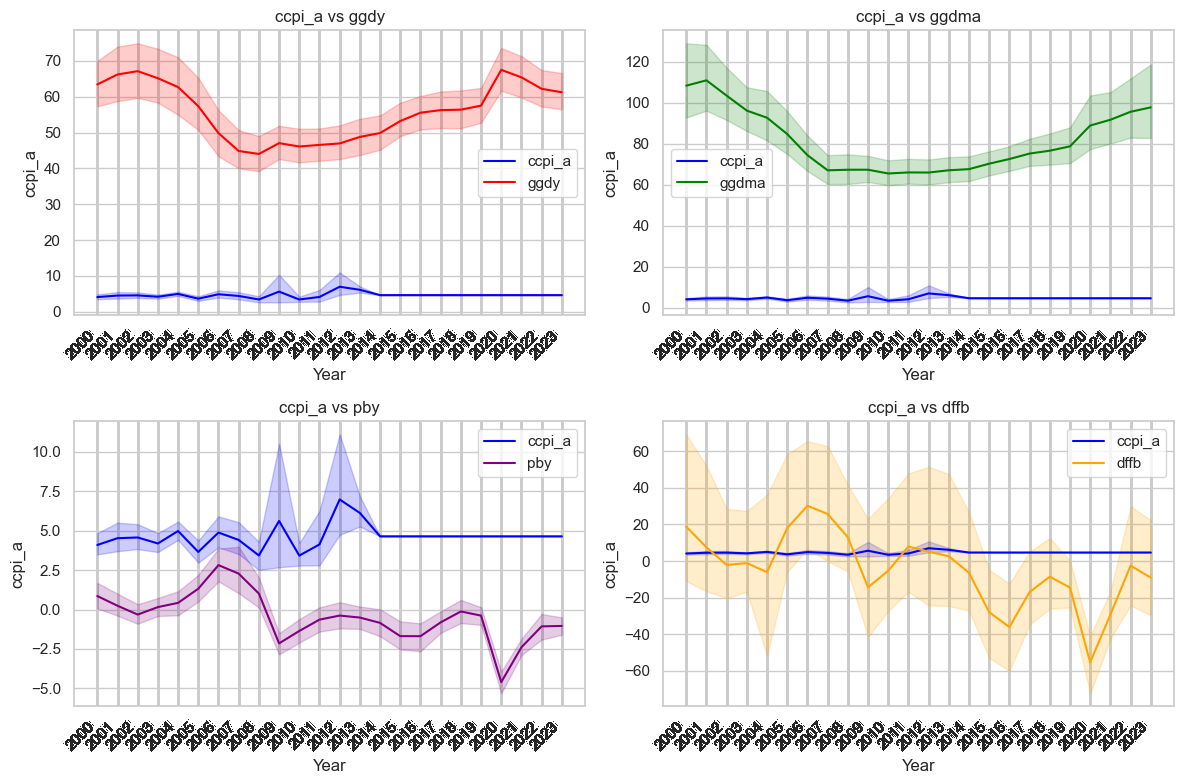

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting each feature against 'ccpi_a'
sns.lineplot(x='Year', y='ccpi_a', data=base_df, ax=axes[0, 0], label='ccpi_a', color='blue')
sns.lineplot(x='Year', y='ggdy', data=base_df, ax=axes[0, 0], label='ggdy', color='red')

sns.lineplot(x='Year', y='ccpi_a', data=base_df, ax=axes[0, 1], label='ccpi_a', color='blue')
sns.lineplot(x='Year', y='ggdma', data=base_df, ax=axes[0, 1], label='ggdma', color='green')

sns.lineplot(x='Year', y='ccpi_a', data=base_df, ax=axes[1, 0], label='ccpi_a', color='blue')
sns.lineplot(x='Year', y='pby', data=base_df, ax=axes[1, 0], label='pby', color='purple')

sns.lineplot(x='Year', y='ccpi_a', data=base_df, ax=axes[1, 1], label='ccpi_a', color='blue')
sns.lineplot(x='Year', y='dffb', data=base_df, ax=axes[1, 1], label='dffb', color='orange')

for ax in axes.flat:
    ax.set_xticks(base_df['Year'])  
    ax.set_xticklabels(base_df['Year'], rotation=45, ha='right')

axes[0, 0].set_title('ccpi_a vs ggdy')
axes[0, 1].set_title('ccpi_a vs ggdma')
axes[1, 0].set_title('ccpi_a vs pby')
axes[1, 1].set_title('ccpi_a vs dffb')
plt.tight_layout()
plt.show()

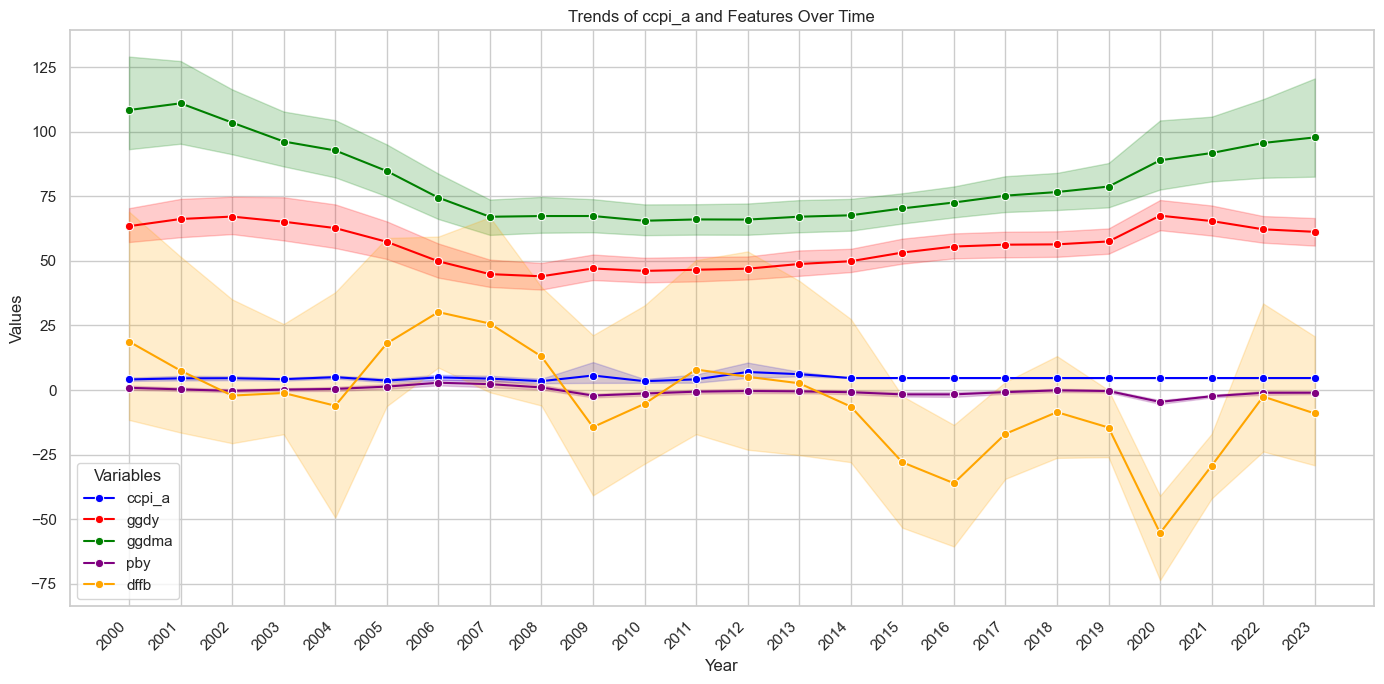

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='ccpi_a', data=base_df, label='ccpi_a', color='blue', marker='o')
sns.lineplot(x='Year', y='ggdy', data=base_df, label='ggdy', color='red', marker='o')
sns.lineplot(x='Year', y='ggdma', data=base_df, label='ggdma', color='green', marker='o')
sns.lineplot(x='Year', y='pby', data=base_df, label='pby', color='purple', marker='o')
sns.lineplot(x='Year', y='dffb', data=base_df, label='dffb', color='orange', marker='o')

plt.title('Trends of ccpi_a and Features Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variables')
plt.tight_layout()
plt.show()


# Inflation Data Preprocess

### Melting Year data with Country

In [25]:
# take inflation data for target variable
inf_df = pd.read_excel("data/Inflation-data.xlsx", sheet_name="ccpi_a")
non_year_column = ['Country']
year_column = [year for year in range(2000, 2024)]
inf_df = pd.melt(inf_df, id_vars=non_year_column, value_vars=year_column, 
                    var_name='Year', value_name="ccpi_a")
inf_df = inf_df.drop(inf_df.index[-1])
inf_df = inf_df.dropna(subset=['Country'])
inf_df = inf_df.reset_index(drop=True)

### Handle Missing Value

In [26]:
inf_df['ccpi_a'] = inf_df['ccpi_a'].fillna(inf_df['ccpi_a'].mean()) 
missing_values_count = inf_df.isnull().sum()
print("Missing values count: ", missing_values_count)

Missing values count:  Country    0
Year       0
ccpi_a     0
dtype: int64


### Shift one row below 

In [27]:
# Shift one value
inf_df['ccpi_a'] = inf_df['ccpi_a'].shift(1)
last_value = inf_df['ccpi_a'].iloc[-1]
inf_df['ccpi_a'] = inf_df['ccpi_a'].fillna(inf_df['ccpi_a'].mean()) 

In [28]:
last_value

np.float64(4.646787686839783)

In [29]:
inf_df

,Country,Year,ccpi_a
0,Afghanistan,2000,4.646715
1,Albania,2000,4.646788
2,Australia,2000,4.646788
3,Austria,2000,4.187311
4,Armenia,2000,1.655172
...,...,...,...
2707,United States,2023,4.646788
2708,"Venezuela, RB",2023,4.781926
2709,Vietnam,2023,4.646788
2710,Kosovo,2023,4.154691


# Fiscal Data Preprocess

## Government debt sustainability

In [30]:
df = pd.read_csv("data/fiscal/gov_debt_sus.csv")

### Handle missing value

In [31]:
missing_values_count = df.isnull().sum()
print("\nMissing values count in each column:\n", missing_values_count)


Missing values count in each column:
 Country      0
Year         0
ggdy       374
pby        446
fby        282
dfggd      502
dffb       417
ggdma      470
fbma       393
dtype: int64


In [32]:
df_filled = df.fillna(df.mean(numeric_only=True))

missing_values_count_after_filling = df_filled.isnull().sum()
print("\nMissing values count after filling:\n", missing_values_count_after_filling)



Missing values count after filling:
 Country    0
Year       0
ggdy       0
pby        0
fby        0
dfggd      0
dffb       0
ggdma      0
fbma       0
dtype: int64


### Merge Inflation Data with Fiscal data on common country and year

In [33]:
# Merging Dataframes

# Method 1: => merge on common country code and Year
df_filled = pd.merge(inf_df, df_filled, on=['Country', 'Year'], how='inner')



In [ ]:
df_filled

,Country,Year,ccpi_a,ggdy,pby,fby,dfggd,dffb,ggdma,fbma
0,Afghanistan,2000,4.646715,55.879158,-0.452673,-1.932992,454.093094,-4.455611,81.350557,-2.543310
1,Albania,2000,4.646788,63.769000,-1.872000,-7.772000,367.048895,-44.734965,117.576103,-14.329870
2,Australia,2000,4.646788,19.497000,1.926000,1.250000,69.644208,4.465059,25.071448,1.608677
3,Austria,2000,4.187311,65.738000,0.666000,-2.063000,237.915350,-7.466296,78.242840,-2.455429
4,Armenia,2000,1.655172,39.597000,-0.452673,-1.932992,237.920526,-4.455611,79.246084,-2.543310
...,...,...,...,...,...,...,...,...,...,...
2539,Uruguay,2023,12.933346,60.331000,-0.927000,-3.076000,363.713262,-18.544065,83.647760,-4.264814
2540,United States,2023,4.646788,122.148000,-5.773000,-8.791000,627.164301,-45.137058,155.778068,-11.211358
2541,"Venezuela, RB",2023,4.781926,148.230000,-3.186000,-3.390000,1185.805864,-27.119219,81.350557,-2.543310
2542,Kosovo,2023,4.154691,17.449000,0.192000,-0.206000,88.244852,-1.041804,24.021705,-0.283596


### Handle Outlier with IQR Method

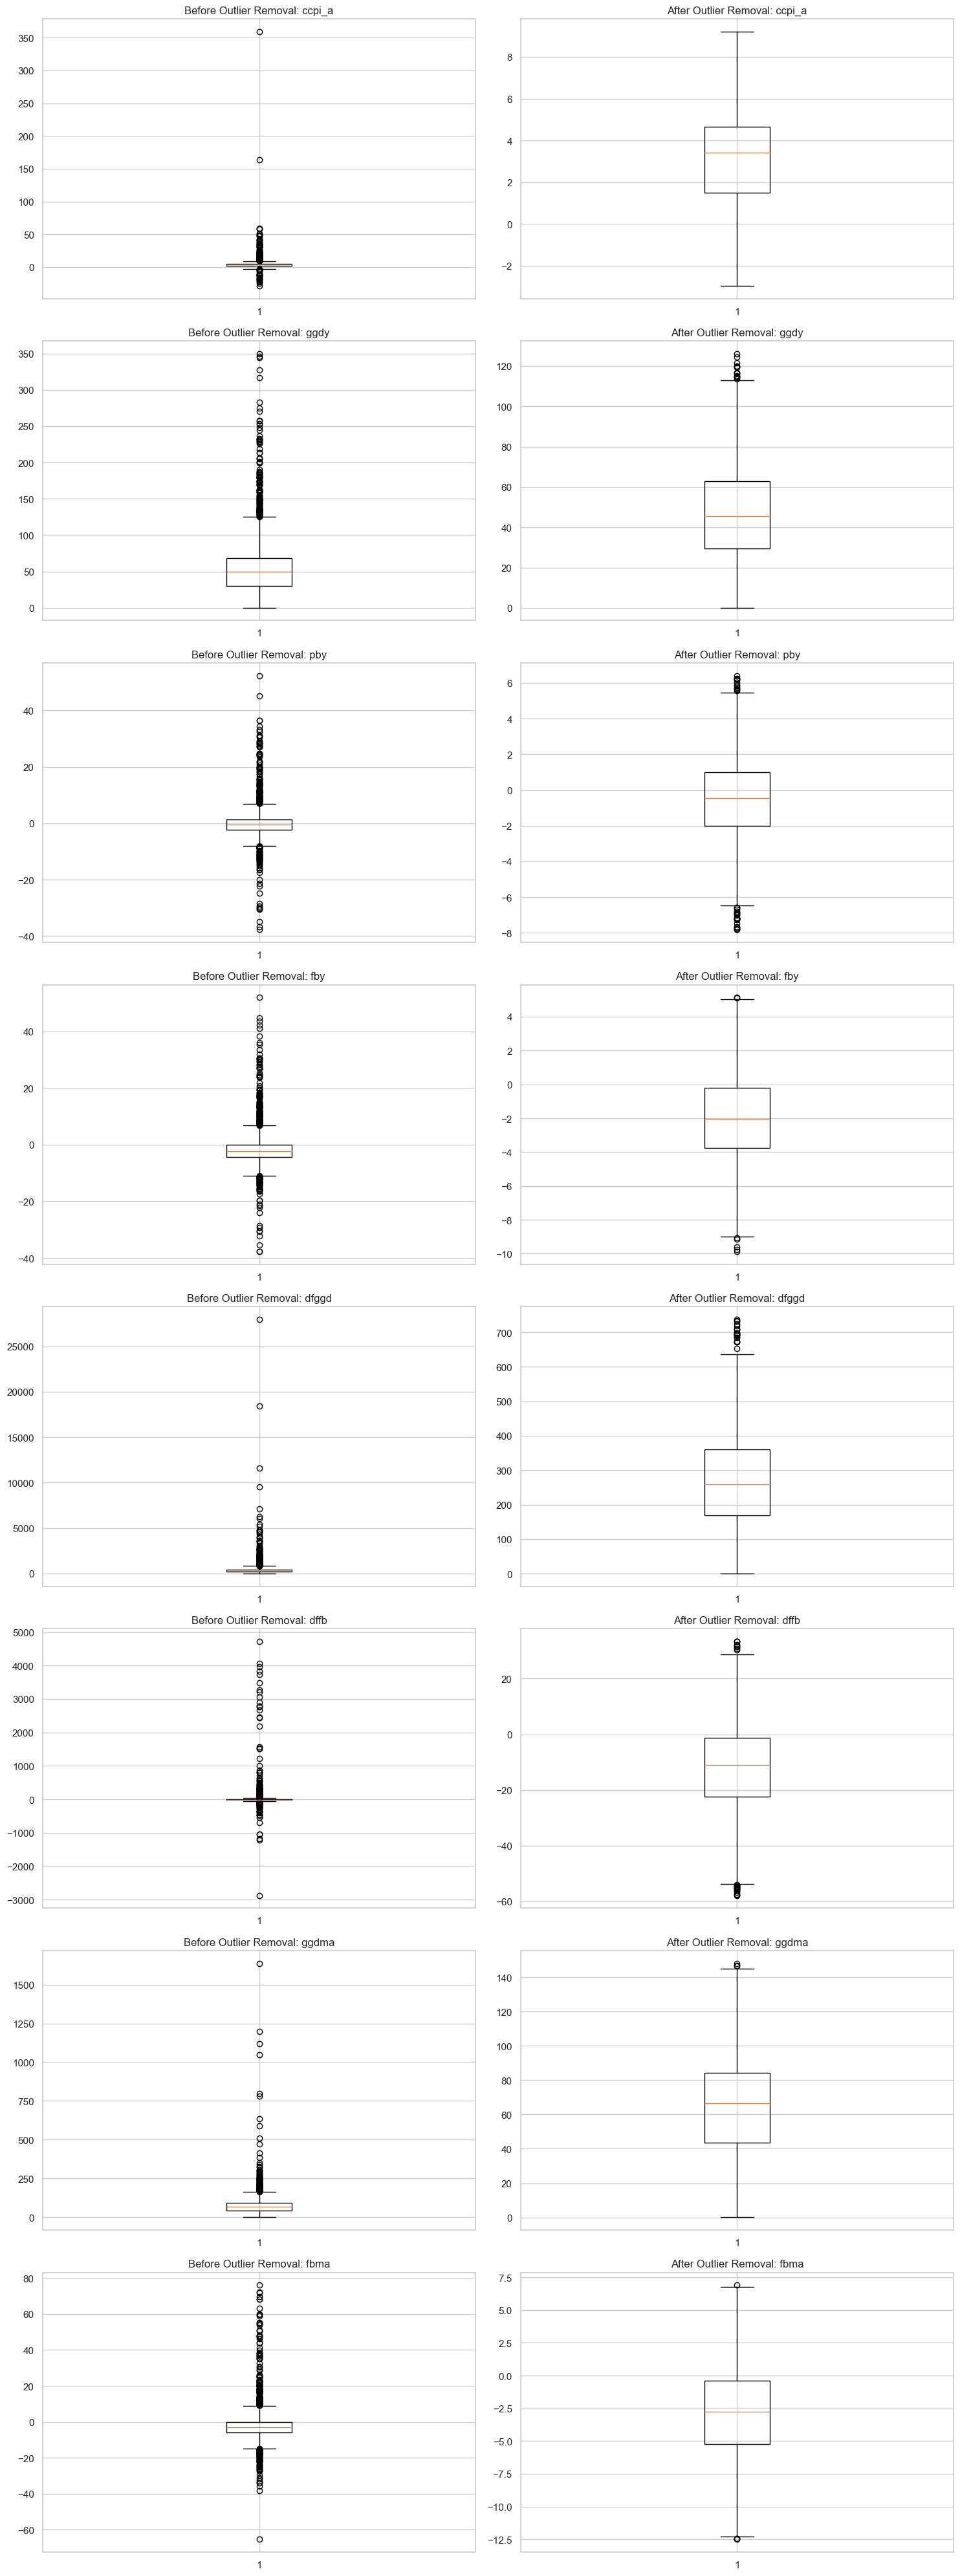

In [34]:
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    df_no_outliers = df.copy()
    
    for col in numeric_columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

df_no_outliers = remove_outliers_iqr(df_filled)
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, len(numeric_columns)*5))

for i, col in enumerate(numeric_columns):
    # Box plot before removing outliers
    axes[i, 0].boxplot(df_filled[col].dropna())
    axes[i, 0].set_title(f'Before Outlier Removal: {col}')
    
    # Box plot after removing outliers
    axes[i, 1].boxplot(df_no_outliers[col].dropna())
    axes[i, 1].set_title(f'After Outlier Removal: {col}')

plt.tight_layout()
plt.show()


In [35]:
duplicate_rows = df_no_outliers[df_no_outliers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Plot Histograms

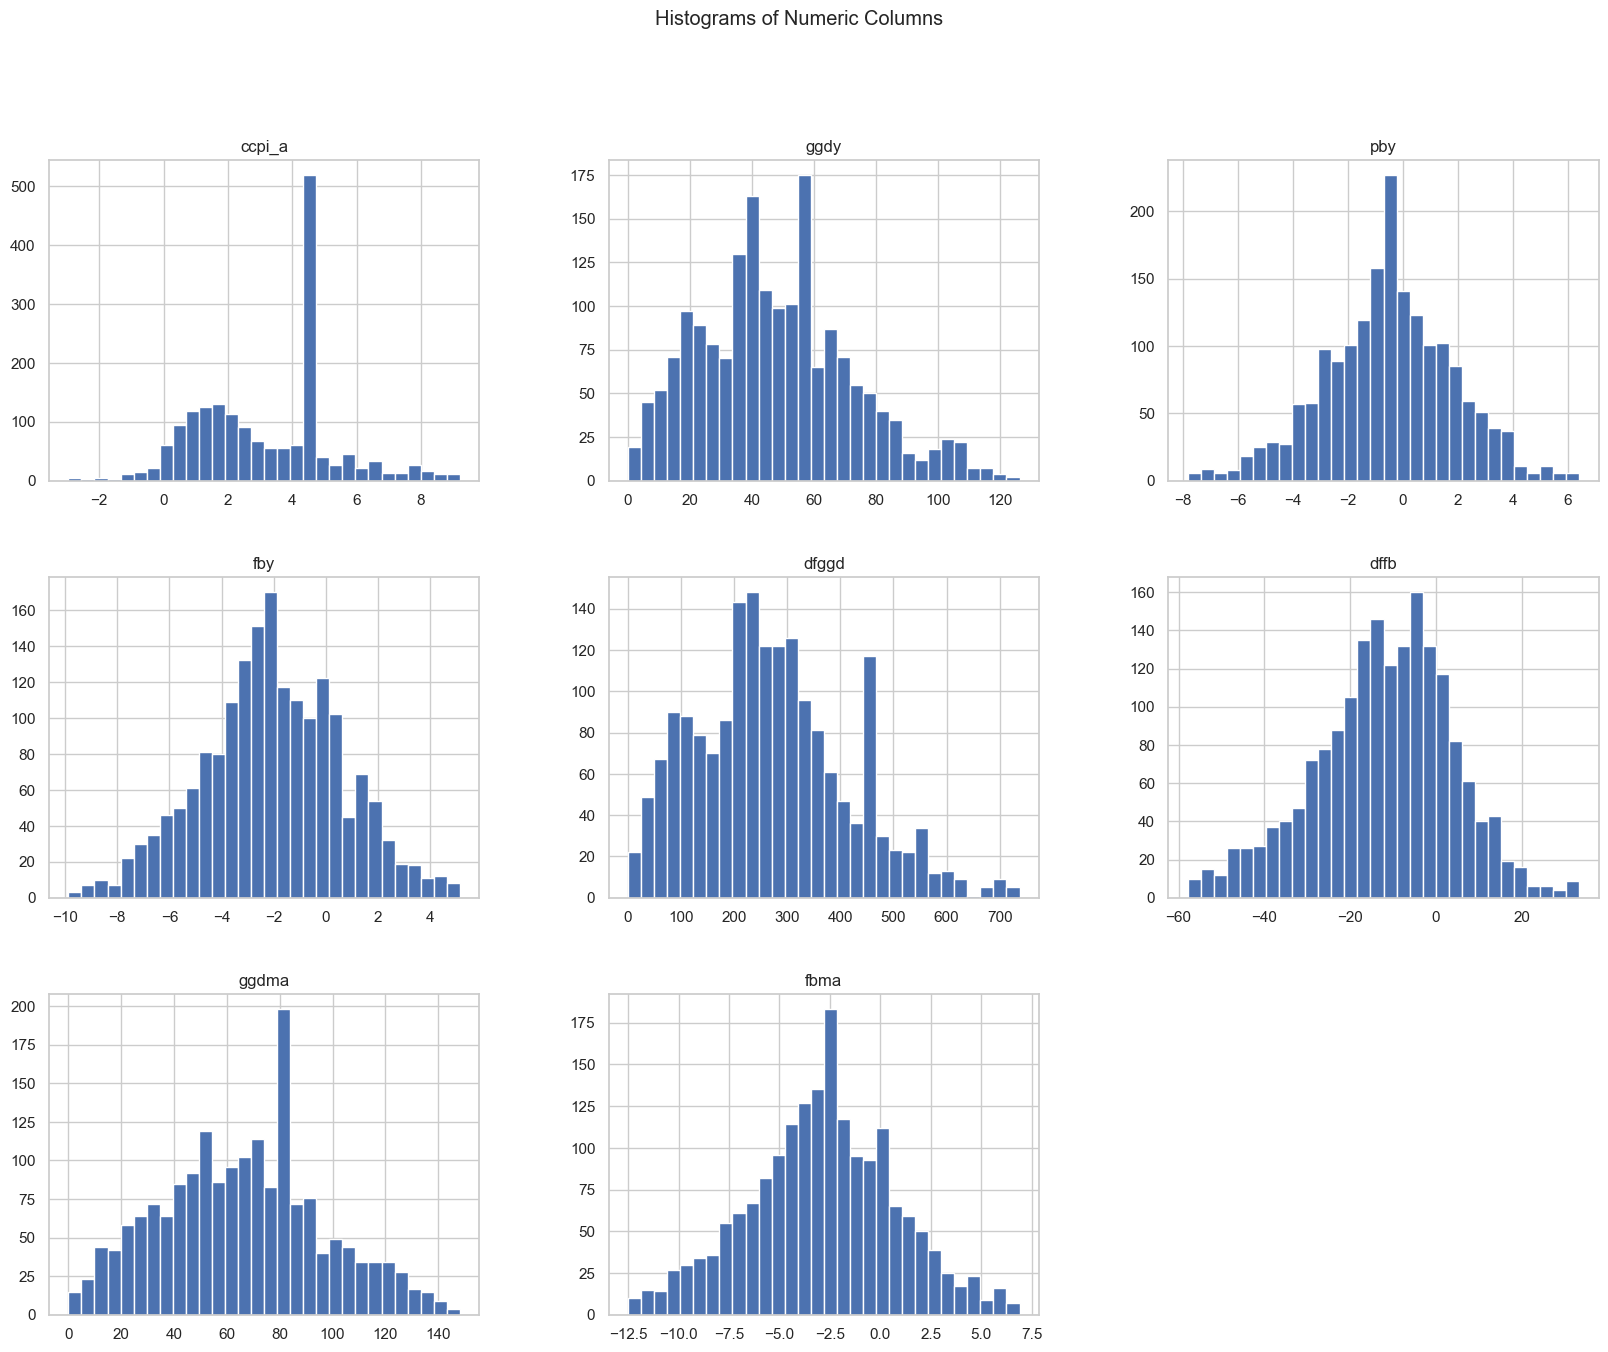

In [36]:
# Histograms
df_no_outliers.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

In [37]:
df_no_outliers

,Country,Year,ccpi_a,ggdy,pby,fby,dfggd,dffb,ggdma,fbma
0,Afghanistan,2000,4.646715,55.879158,-0.452673,-1.932992,454.093094,-4.455611,81.350557,-2.543310
2,Australia,2000,4.646788,19.497000,1.926000,1.250000,69.644208,4.465059,25.071448,1.608677
3,Austria,2000,4.187311,65.738000,0.666000,-2.063000,237.915350,-7.466296,78.242840,-2.455429
4,Armenia,2000,1.655172,39.597000,-0.452673,-1.932992,237.920526,-4.455611,79.246084,-2.543310
5,Azerbaijan,2000,-2.957148,13.133000,0.539000,0.145000,98.421392,1.086660,29.706980,0.325729
...,...,...,...,...,...,...,...,...,...,...
2535,Turkmenistan,2023,4.646788,4.703000,-0.452673,1.302000,66.382819,18.377723,6.590720,1.824605
2536,Tunisia,2023,3.902368,76.557000,-2.954000,-6.621000,376.721758,-32.580623,105.004665,-9.081284
2537,Uganda,2023,2.033782,49.929000,-1.824000,-5.042000,563.108429,-56.864602,72.173915,-7.288367
2542,Kosovo,2023,4.154691,17.449000,0.192000,-0.206000,88.244852,-1.041804,24.021705,-0.283596


### Perform Data scaling

In [40]:
# Z-score Standardization
scaler = StandardScaler()
df_standardized = df_no_outliers.copy()
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])


In [41]:
df_standardized

,Country,Year,ccpi_a,ggdy,pby,fby,dfggd,dffb,ggdma,fbma
0,Afghanistan,2000,0.655351,0.335003,0.032469,0.053052,1.258601,0.479933,0.500512,0.097214
2,Australia,2000,0.655385,-1.145885,1.035845,1.244153,-1.406639,1.029999,-1.335050,1.229259
3,Austria,2000,0.439906,0.736295,0.504350,0.004402,-0.240078,0.294288,0.399152,0.121175
4,Armenia,2000,-0.747577,-0.327741,0.032469,0.053052,-0.240042,0.479933,0.431874,0.097214
5,Azerbaijan,2000,-2.910591,-1.404923,0.450778,0.830653,-1.207137,0.821680,-1.183861,0.879462
...,...,...,...,...,...,...,...,...,...,...
2535,Turkmenistan,2023,0.655385,-1.748055,0.032469,1.263612,-1.429249,1.887882,-1.937805,1.288132
2536,Tunisia,2023,0.306278,1.176668,-1.022645,-1.701238,0.722215,-1.254311,1.271998,-1.685372
2537,Uganda,2023,-0.570022,0.092810,-0.545986,-1.110364,2.014364,-2.751709,0.201213,-1.196531
2542,Kosovo,2023,0.424609,-1.229246,0.304406,0.699306,-1.277688,0.690435,-1.369288,0.713328


### Perform PCA for feature Selection

In [42]:
tmp = df_standardized.drop(columns="ccpi_a")
numeric_columns = tmp.select_dtypes(include=['float64', 'int64']).columns

In [46]:
# Unsupervised Feature Selection: PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
df_pca = pca.fit_transform(tmp[numeric_columns])
print(f"Number of principal components to retain 95% variance: {pca.n_components_}")

Number of principal components to retain 95% variance: 4


In [47]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_columns)
loadings.head(10)

,PC1,PC2,PC3,PC4
ggdy,-0.297904,0.501249,-0.457367,-0.130870
pby,0.355614,0.400958,0.201802,0.753944
fby,0.454715,0.217979,0.162486,-0.117376
dfggd,-0.305189,0.430728,0.722315,-0.356619
dffb,0.428921,0.233370,-0.375063,-0.344310
ggdma,-0.314156,0.503722,-0.242023,0.192669
fbma,0.449687,0.216201,0.051996,-0.343245


C:\Users\Meet\AppData\Local\Temp\ipykernel_4840\2986235715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')


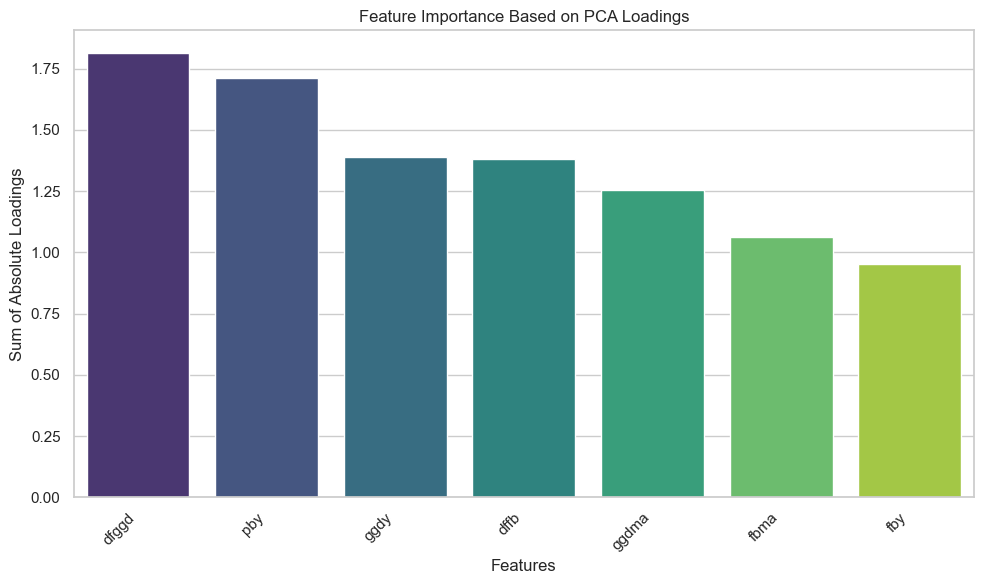

In [48]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_columns)
feature_importance = loadings.abs().sum(axis=1).sort_values(ascending=False)

# print("Most important features:")
# print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Loadings')
plt.tight_layout()
plt.show()

### Label Encoding for object type columns

In [50]:
label_encoder = LabelEncoder()

for column in ['Country']:
    df_standardized[column] = label_encoder.fit_transform(df_standardized[column])

In [51]:
selected_feature_pca = ["dfggd", "pby", "ggdy", "dffb", "ccpi_a"]
df2 = df_standardized[selected_feature_pca]

In [52]:
X = df2.drop(columns=['ccpi_a'])
y = df2['ccpi_a']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Features selection with Random Forest

In [55]:
# Feature selection using random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Select top N important features 
top_n = pca.n_components_
top_features = feature_importances.head(top_n)['Feature'].tolist()
print(f"Top {top_n} features: {top_features}")

  Feature  Importance
2    ggdy    0.276742
1     pby    0.252017
0   dfggd    0.240726
3    dffb    0.230515
Top 4 features: ['ggdy', 'pby', 'dfggd', 'dffb']


### Feature Selection with RFE

In [58]:
model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)


feature_ranking = rfe.ranking_
feature_names = X.columns
rfe_features = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Select the top-ranked features
selected_features = rfe_features[rfe_features['Ranking'] == 1]['Feature'].tolist()
print(f"Selected features by RFE: {selected_features}")

Selected features by RFE: ['dfggd', 'pby', 'ggdy', 'dffb']


c:\Users\Meet\Desktop\Desktop Folders\Projects\Temp\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
# X_selected_rfe = df_no_outliers[selected_features]

### Perform AutoEncoder
### Apply K-Fold Validation
### Train regression models

c:\Users\Meet\Desktop\Desktop Folders\Projects\Temp\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.2318 - val_loss: 0.0152
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.5151e-04 - val_loss: 0.0014
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.9641e-04 - val_loss: 6.5337e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2869e-04 - val_loss: 6.3185e-04
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7461e-04 - val_loss: 0.0028
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4012e-04 - val_loss: 5.2680e-04
Epoch 10/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2939e-04 - val_loss: 0.0011
Epoch 11/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6263e-04 - val_loss: 0.0015
Epoch 12/30
91/91 ━━━━━━━━━━━━━

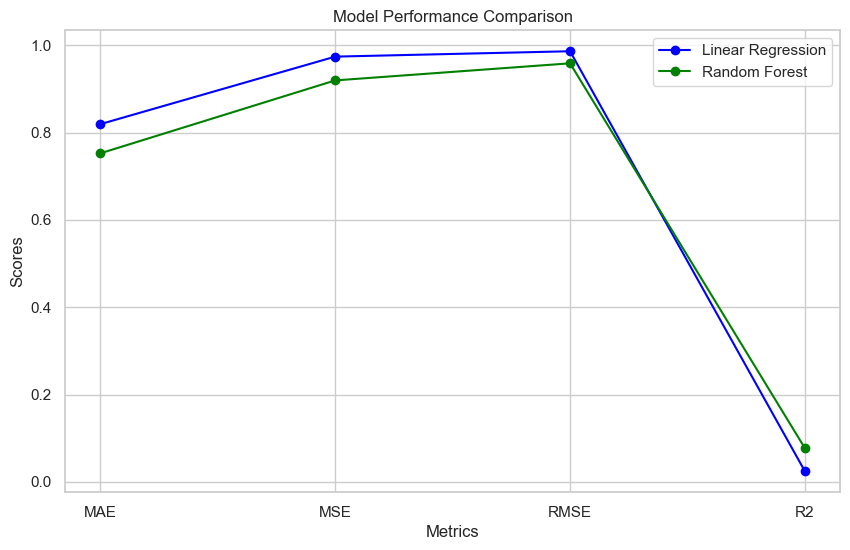

In [62]:
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

input_dim = X.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.fit(X, X, epochs=30, batch_size=16, validation_split=0.2)

# Encoder model to reduce dimensionality
encoder_model = Sequential()
for layer in autoencoder.layers[:3]:  # Using only the encoder part
    encoder_model.add(layer)
df_autoencoded = encoder_model.predict(X)

# Prepare the autoencoded data for regression
X_autoencoded = pd.DataFrame(df_autoencoded)


X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    mae_mean = -mae_scores.mean()
    mse_mean = -mse_scores.mean()
    rmse_mean = np.sqrt(-mse_scores).mean()
    r2_mean = r2_scores.mean()

    return mae_mean, mse_mean, rmse_mean, r2_mean

# Evaluate Linear Regression
lr_mae, lr_mse, lr_rmse, lr_r2 = evaluate_model(lr, X_autoencoded, y)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

# Evaluate Random Forest
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf, X_autoencoded, y)
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")


# lr.fit(X_train, y_train)
# rf.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred_rf = rf.predict(X_test)
# print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
# print("Random Forest - R2 Score:", r2_score(y_test, y_pred_rf))


# y_pred = lr.predict(X_test)
# print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("Linear Regression - R2 Score:", r2_score(y_test, y_pred))


metrics = ['MAE', 'MSE', 'RMSE', 'R2']
lr_values = [lr_mae, lr_mse, lr_rmse, lr_r2]
rf_values = [rf_mae, rf_mse, rf_rmse, rf_r2]

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(metrics, lr_values, marker='o', label='Linear Regression', color='blue')
plt.plot(metrics, rf_values, marker='o', label='Random Forest', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

plt.grid(True)
plt.show()

### Perform P test for feature comparision

In [64]:
from scipy.stats import pearsonr

In [65]:
# pearsonr test for feature dependency comaprision 

infl_col = 'ccpi_a'
fiscal_col = ['ggdy', 'pby', 'fby', 'dfggd', 'dffb', 'ggdma', 'fbma']
for feature in fiscal_col:
    corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])
    print(f'Pearson correlation coefficient between {infl_col} and {feature}: {corr}, p-value: {p_value}')


Pearson correlation coefficient between ccpi_a and ggdy: 0.10997787214205326, p-value: 2.681770163327589e-06
Pearson correlation coefficient between ccpi_a and pby: 0.04882403140273807, p-value: 0.037644854314076465
Pearson correlation coefficient between ccpi_a and fby: -0.01555330019080005, p-value: 0.508078569455787
Pearson correlation coefficient between ccpi_a and dfggd: 0.09041546270118489, p-value: 0.00011569493531929709
Pearson correlation coefficient between ccpi_a and dffb: 0.0034761622163567937, p-value: 0.8824129676063912
Pearson correlation coefficient between ccpi_a and ggdma: 0.14469625673351602, p-value: 6.038592915400242e-10
Pearson correlation coefficient between ccpi_a and fbma: -0.036285940614386294, p-value: 0.12247346144043422


### MIR for feature comparision

In [66]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = df_standardized.drop(columns=['ccpi_a'])
y = df_standardized['ccpi_a']


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print(mi_df)

   Feature  Mutual Information
0  Country            0.347892
1     Year            0.110540
2     ggdy            0.074942
3      pby            0.014581
4      fby            0.000000
5    dfggd            0.072530
6     dffb            0.014754
7    ggdma            0.061961
8     fbma            0.000000


## Balance sheet composition

In [67]:
df = pd.read_csv("data/fiscal/balance_sheet_comp.csv")

In [68]:
missing_values_count = df.isnull().sum()
print("\nMissing values count in each column:\n", missing_values_count)


Missing values count in each column:
 Country         0
Year            0
fxsovsh      4042
secnres      3883
fordebtsh    3490
concggd      2194
avglife      3846
debtduey     3184
dtype: int64


### Handle Missing Value

In [69]:
df_filled = df.fillna(df.mean(numeric_only=True))

missing_values_count_after_filling = df_filled.isnull().sum()
print("\nMissing values count after filling:\n", missing_values_count_after_filling)



Missing values count after filling:
 Country      0
Year         0
fxsovsh      0
secnres      0
fordebtsh    0
concggd      0
avglife      0
debtduey     0
dtype: int64


### Merge Inflation Data with Fiscal data on common country and year

In [70]:
# Merging Dataframes

df_filled = pd.merge(inf_df, df_filled, on=['Country', 'Year'], how='inner')

### Handle Outlier with IQR Method

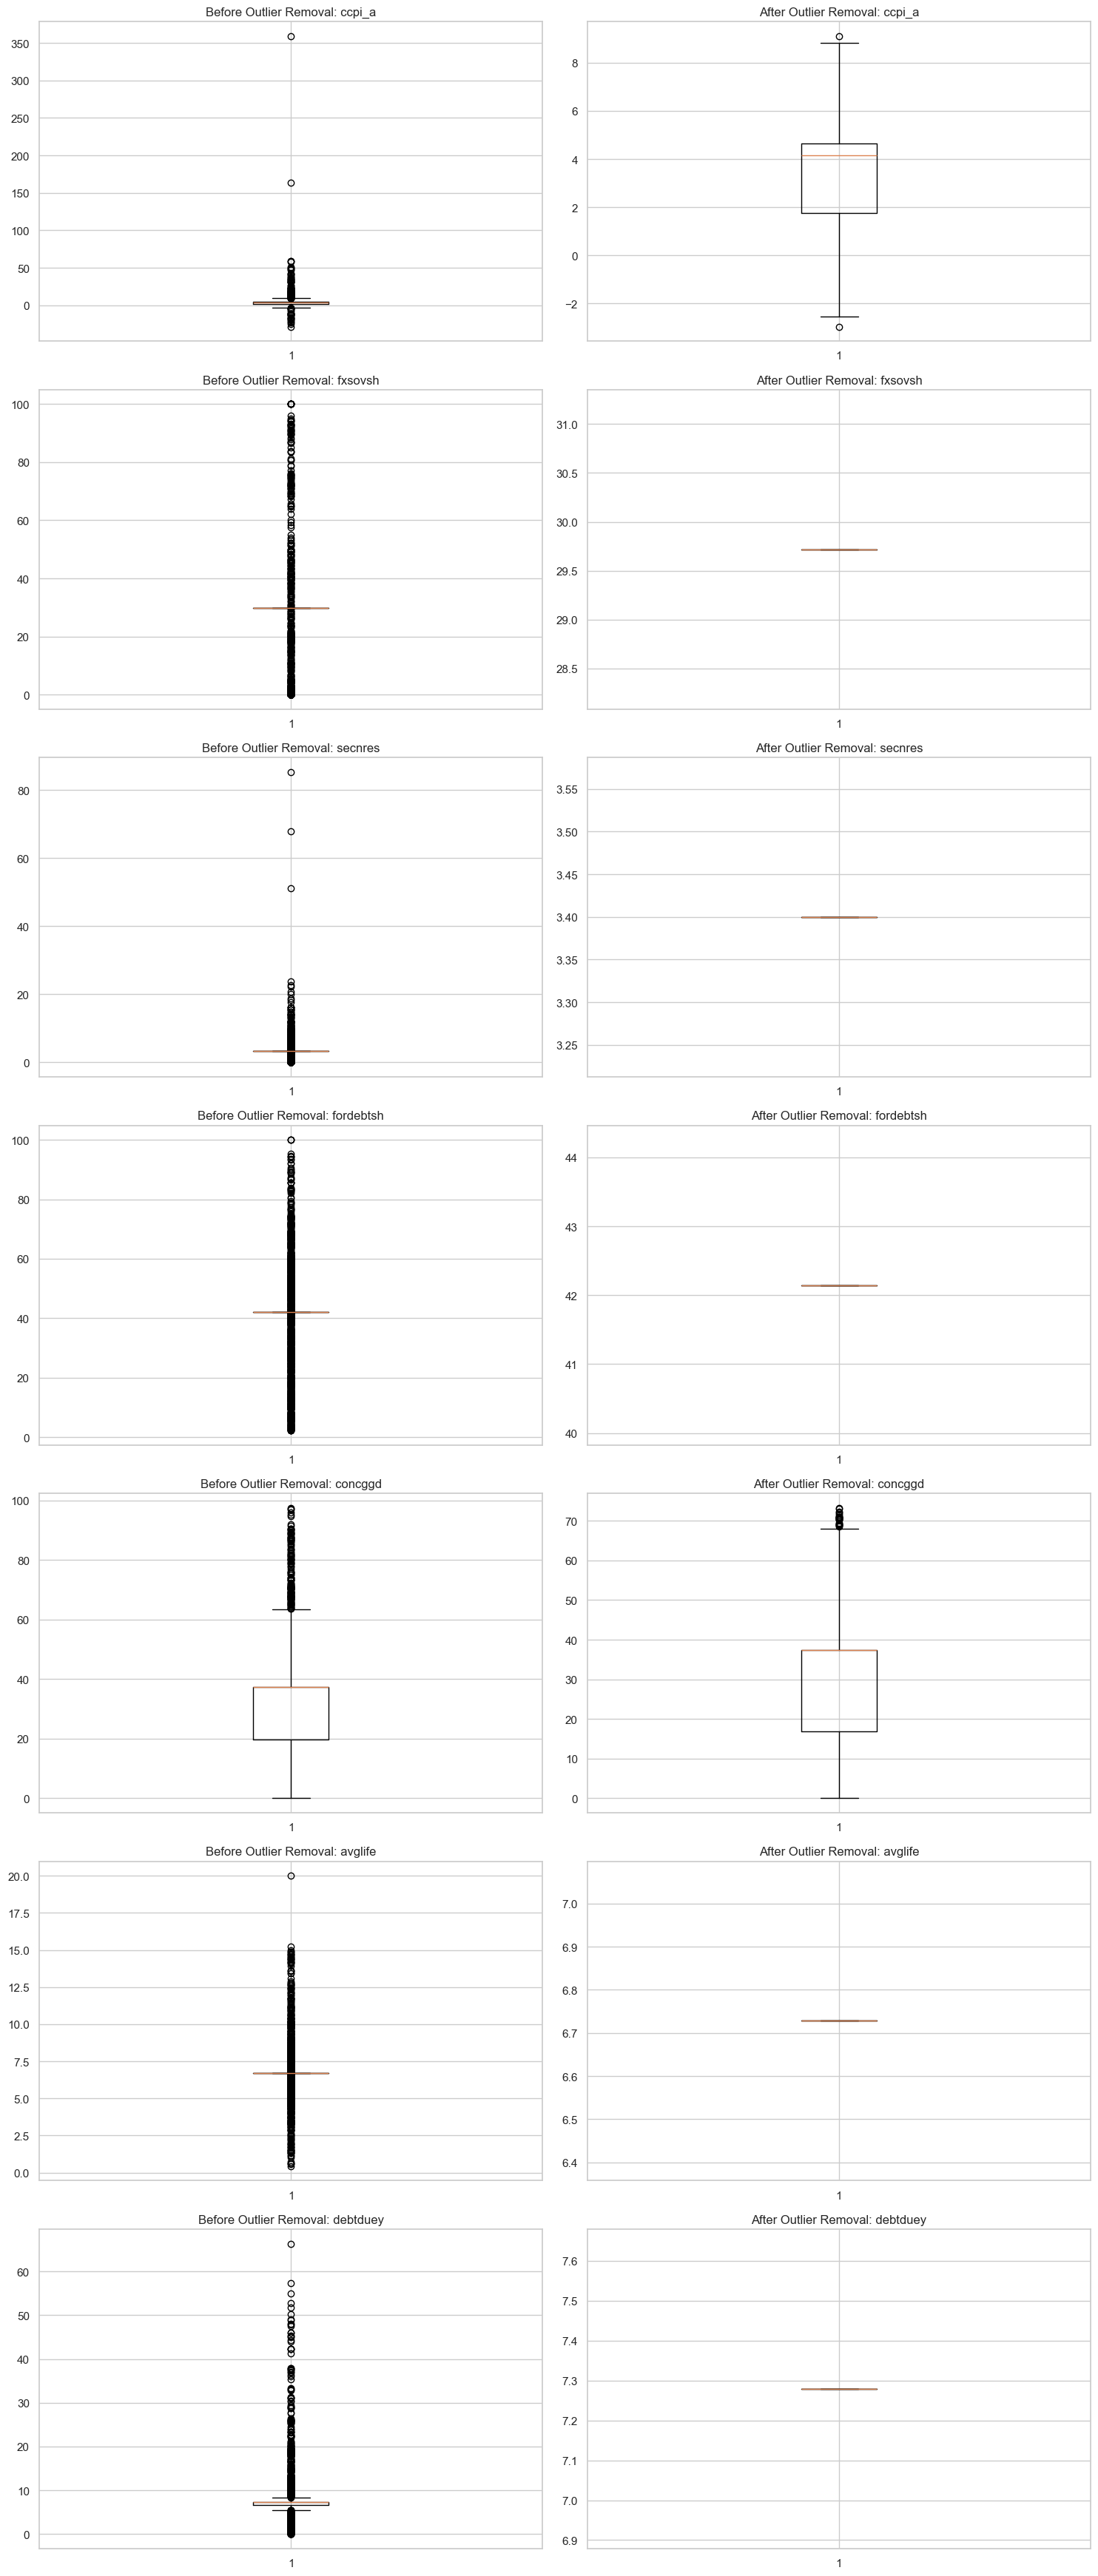

In [71]:
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    df_no_outliers = df.copy()
    
    for col in numeric_columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

df_no_outliers = remove_outliers_iqr(df_filled)
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, len(numeric_columns)*5))

for i, col in enumerate(numeric_columns):
    # Box plot before removing outliers
    axes[i, 0].boxplot(df_filled[col].dropna())
    axes[i, 0].set_title(f'Before Outlier Removal: {col}')
    
    # Box plot after removing outliers
    axes[i, 1].boxplot(df_no_outliers[col].dropna())
    axes[i, 1].set_title(f'After Outlier Removal: {col}')

plt.tight_layout()
plt.show()


In [72]:
duplicate_rows = df_no_outliers[df_no_outliers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Plot Histograms

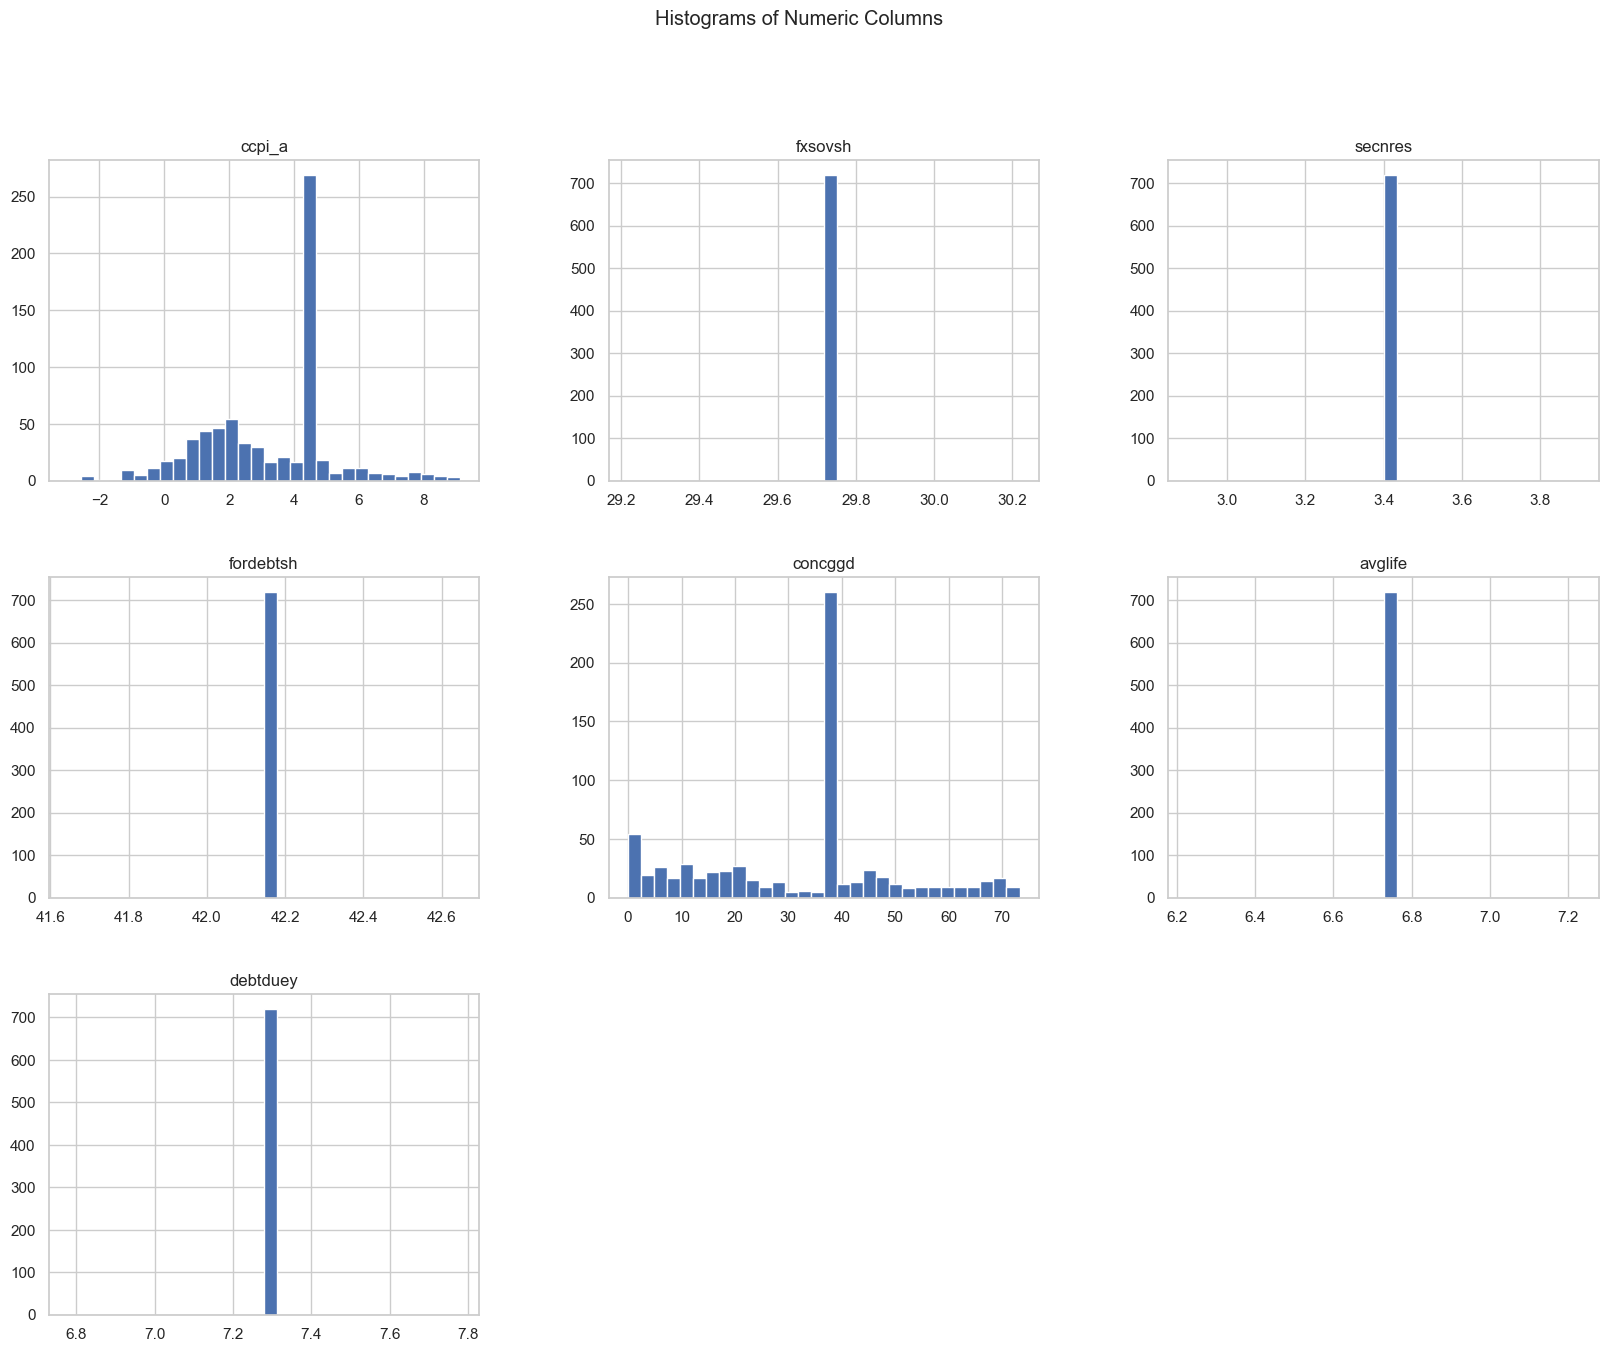

In [73]:
# Histograms
df_no_outliers.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

### Data scaling 

In [74]:
# Z-score Standardization
scaler = StandardScaler()
df_standardized = df_no_outliers.copy()
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])


### Feature Selection Using PCA

In [75]:
tmp = df_standardized.drop(columns="ccpi_a")
numeric_columns = tmp.select_dtypes(include=['float64', 'int64']).columns

In [76]:
# Unsupervised Feature Selection: PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
df_pca = pca.fit_transform(tmp[numeric_columns])
print(f"Number of principal components to retain 95% variance: {pca.n_components_}")

Number of principal components to retain 95% variance: 1


C:\Users\Meet\AppData\Local\Temp\ipykernel_4840\2986235715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')


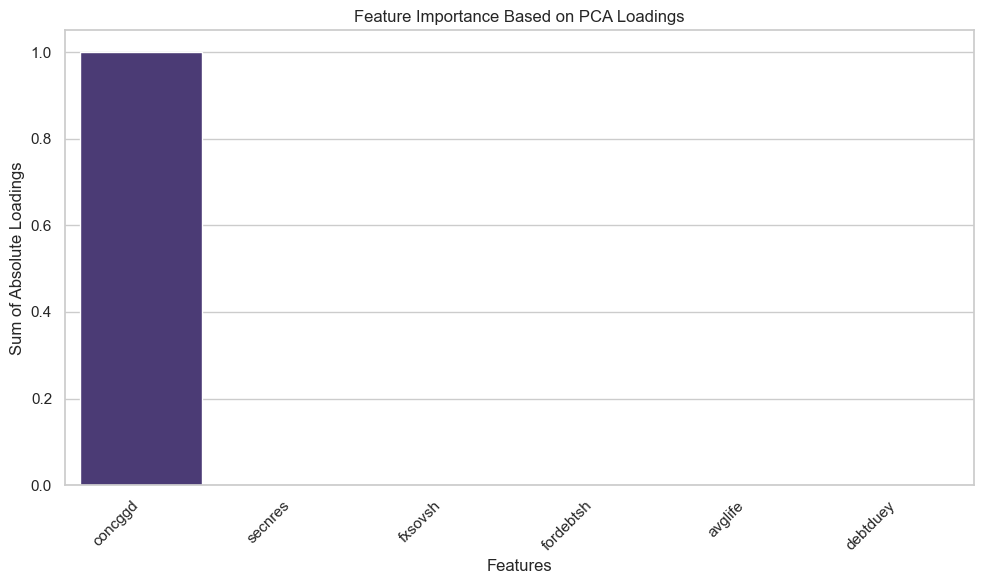

In [77]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_columns)
feature_importance = loadings.abs().sum(axis=1).sort_values(ascending=False)

# print("Most important features:")
# print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Loadings')
plt.tight_layout()
plt.show()

### Perform Label Encode on Non-numeric Column

In [78]:
label_encoder = LabelEncoder()

for column in ['Country']:
    df_standardized[column] = label_encoder.fit_transform(df_standardized[column])

In [79]:
selected_feature_pca = ["concggd", "ccpi_a"]
df2 = df_standardized[selected_feature_pca]

In [80]:
X = df2.drop(columns=['ccpi_a'])
y = df2['ccpi_a']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Selection Using Random Forest 

In [81]:
# Feature selection using random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Select top N important features 
top_n = pca.n_components_
top_features = feature_importances.head(top_n)['Feature'].tolist()
print(f"Top {top_n} features: {top_features}")

   Feature  Importance
0  concggd         1.0
Top 1 features: ['concggd']


### Feature Selection Using RFE

In [82]:
X = df_standardized.drop(columns=['ccpi_a'])
y = df_standardized['ccpi_a']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)


feature_ranking = rfe.ranking_
feature_names = X.columns
rfe_features = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Select the top-ranked features
selected_features = rfe_features[rfe_features['Ranking'] == 1]['Feature'].tolist()
print(f"Selected features by RFE: {selected_features}")

Selected features by RFE: ['Country', 'Year', 'concggd', 'avglife', 'debtduey']


### Process Auto Encoder and train Regression models

In [83]:
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

input_dim = X.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.fit(X, X, epochs=30, batch_size=16, validation_split=0.2)

# Encoder model to reduce dimensionality
encoder_model = Sequential()
for layer in autoencoder.layers[:3]:  # Using only the encoder part
    encoder_model.add(layer)
df_autoencoded = encoder_model.predict(X)

# Prepare the autoencoded data for regression
X_autoencoded = pd.DataFrame(df_autoencoded)


X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    mae_mean = -mae_scores.mean()
    mse_mean = -mse_scores.mean()
    rmse_mean = np.sqrt(-mse_scores).mean()
    r2_mean = r2_scores.mean()

    return mae_mean, mse_mean, rmse_mean, r2_mean

# Evaluate Linear Regression
lr_mae, lr_mse, lr_rmse, lr_r2 = evaluate_model(lr, X_autoencoded, y)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

# Evaluate Random Forest
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf, X_autoencoded, y)
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")


metrics = ['MAE', 'MSE', 'RMSE', 'R2']
lr_values = [lr_mae, lr_mse, lr_rmse, lr_r2]
rf_values = [rf_mae, rf_mse, rf_rmse, rf_r2]

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(metrics, lr_values, marker='o', label='Linear Regression', color='blue')
plt.plot(metrics, rf_values, marker='o', label='Random Forest', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

plt.grid(True)
plt.show()

c:\Users\Meet\Desktop\Desktop Folders\Projects\Temp\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: object

### Comapare features using P-Test

In [84]:
# pearsonr test for feature dependency comaprision 

infl_col = 'ccpi_a'
fiscal_col = ['fxsovsh', 'secnres', 'fordebtsh', 'concggd', 'avglife', 'debtduey']
for feature in fiscal_col:
    corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])
    print(f'Pearson correlation coefficient between {infl_col} and {feature}: {corr}, p-value: {p_value}')


Pearson correlation coefficient between ccpi_a and fxsovsh: nan, p-value: nan
Pearson correlation coefficient between ccpi_a and secnres: nan, p-value: nan
Pearson correlation coefficient between ccpi_a and fordebtsh: nan, p-value: nan
Pearson correlation coefficient between ccpi_a and concggd: -0.06033506517793626, p-value: 0.10598776743234747
Pearson correlation coefficient between ccpi_a and avglife: nan, p-value: nan
Pearson correlation coefficient between ccpi_a and debtduey: nan, p-value: nan


C:\Users\Meet\AppData\Local\Temp\ipykernel_4840\96529069.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])


### Compare features using MIR

In [85]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = df_standardized.drop(columns=['ccpi_a'])
y = df_standardized['ccpi_a']


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print(mi_df)

     Feature  Mutual Information
0    Country            0.500570
1       Year            0.034829
2    fxsovsh            0.000624
3    secnres            0.020042
4  fordebtsh            0.000000
5    concggd            0.086821
6    avglife            0.000000
7   debtduey            0.000000


## External and private sector debt

In [92]:
df = pd.read_csv("data/fiscal/private_sec_debt.csv")

In [93]:
missing_values_count = df.isnull().sum()
print("\nMissing values count in each column:\n", missing_values_count)


Missing values count in each column:
 Country         0
Year            0
xtdebty      1047
fxdebtall    4150
prdebty      1877
pscy          565
stdebtall    1067
stdebtres    1558
xtdebtres    1529
xtdebtrxg    1529
dtype: int64


### Handle Missing Value 

In [94]:
df_filled = df.fillna(df.mean(numeric_only=True))

missing_values_count_after_filling = df_filled.isnull().sum()
print("\nMissing values count after filling:\n", missing_values_count_after_filling)



Missing values count after filling:
 Country      0
Year         0
xtdebty      0
fxdebtall    0
prdebty      0
pscy         0
stdebtall    0
stdebtres    0
xtdebtres    0
xtdebtrxg    0
dtype: int64


### Merge Data with Inflation Data on Country Code and Year

In [95]:
# Merging Dataframes
df_filled = pd.merge(inf_df, df_filled, on=['Country', 'Year'], how='inner')

### Handle Outlier with IQR Method

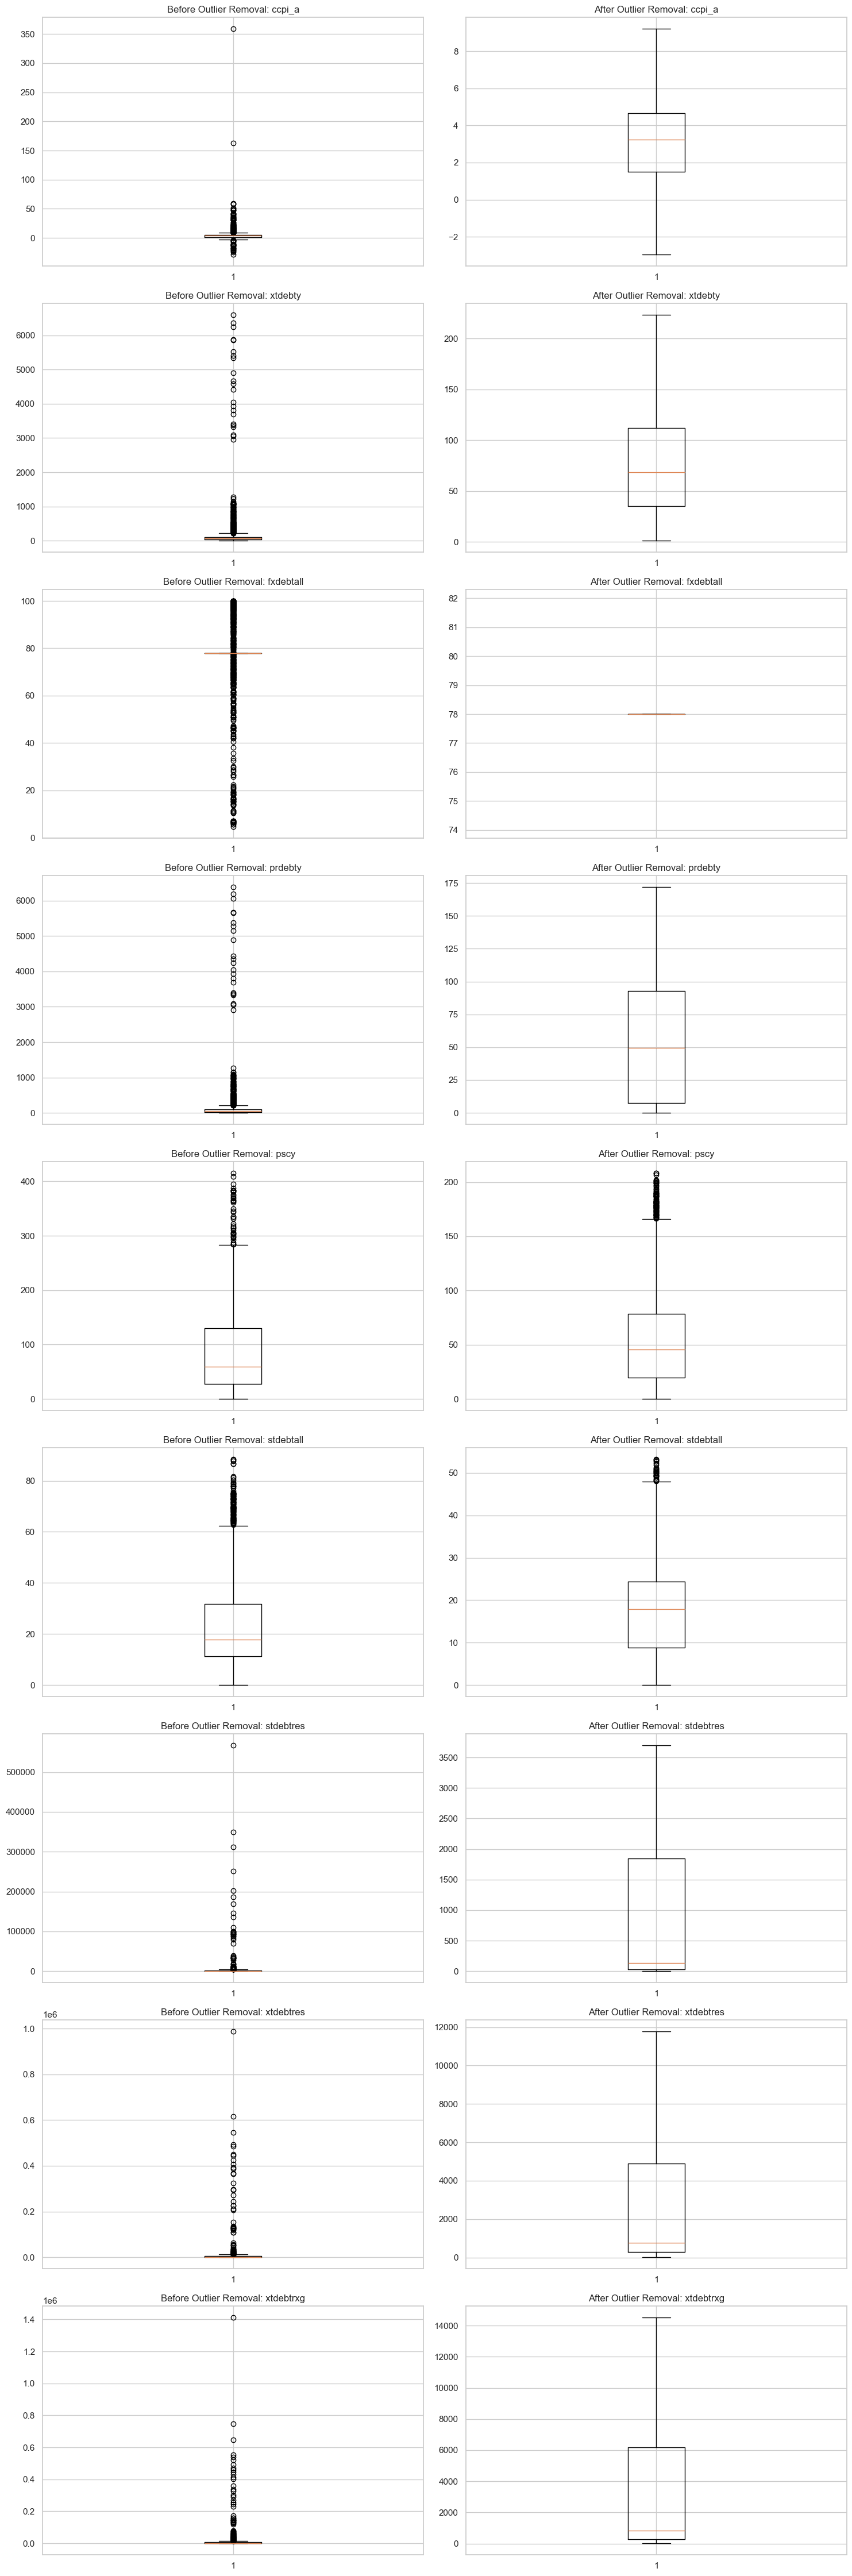

In [96]:
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    df_no_outliers = df.copy()
    
    for col in numeric_columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

df_no_outliers = remove_outliers_iqr(df_filled)
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, len(numeric_columns)*5))

for i, col in enumerate(numeric_columns):
    # Box plot before removing outliers
    axes[i, 0].boxplot(df_filled[col].dropna())
    axes[i, 0].set_title(f'Before Outlier Removal: {col}')
    
    # Box plot after removing outliers
    axes[i, 1].boxplot(df_no_outliers[col].dropna())
    axes[i, 1].set_title(f'After Outlier Removal: {col}')

plt.tight_layout()
plt.show()


In [97]:
duplicate_rows = df_no_outliers[df_no_outliers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Plot Histograms

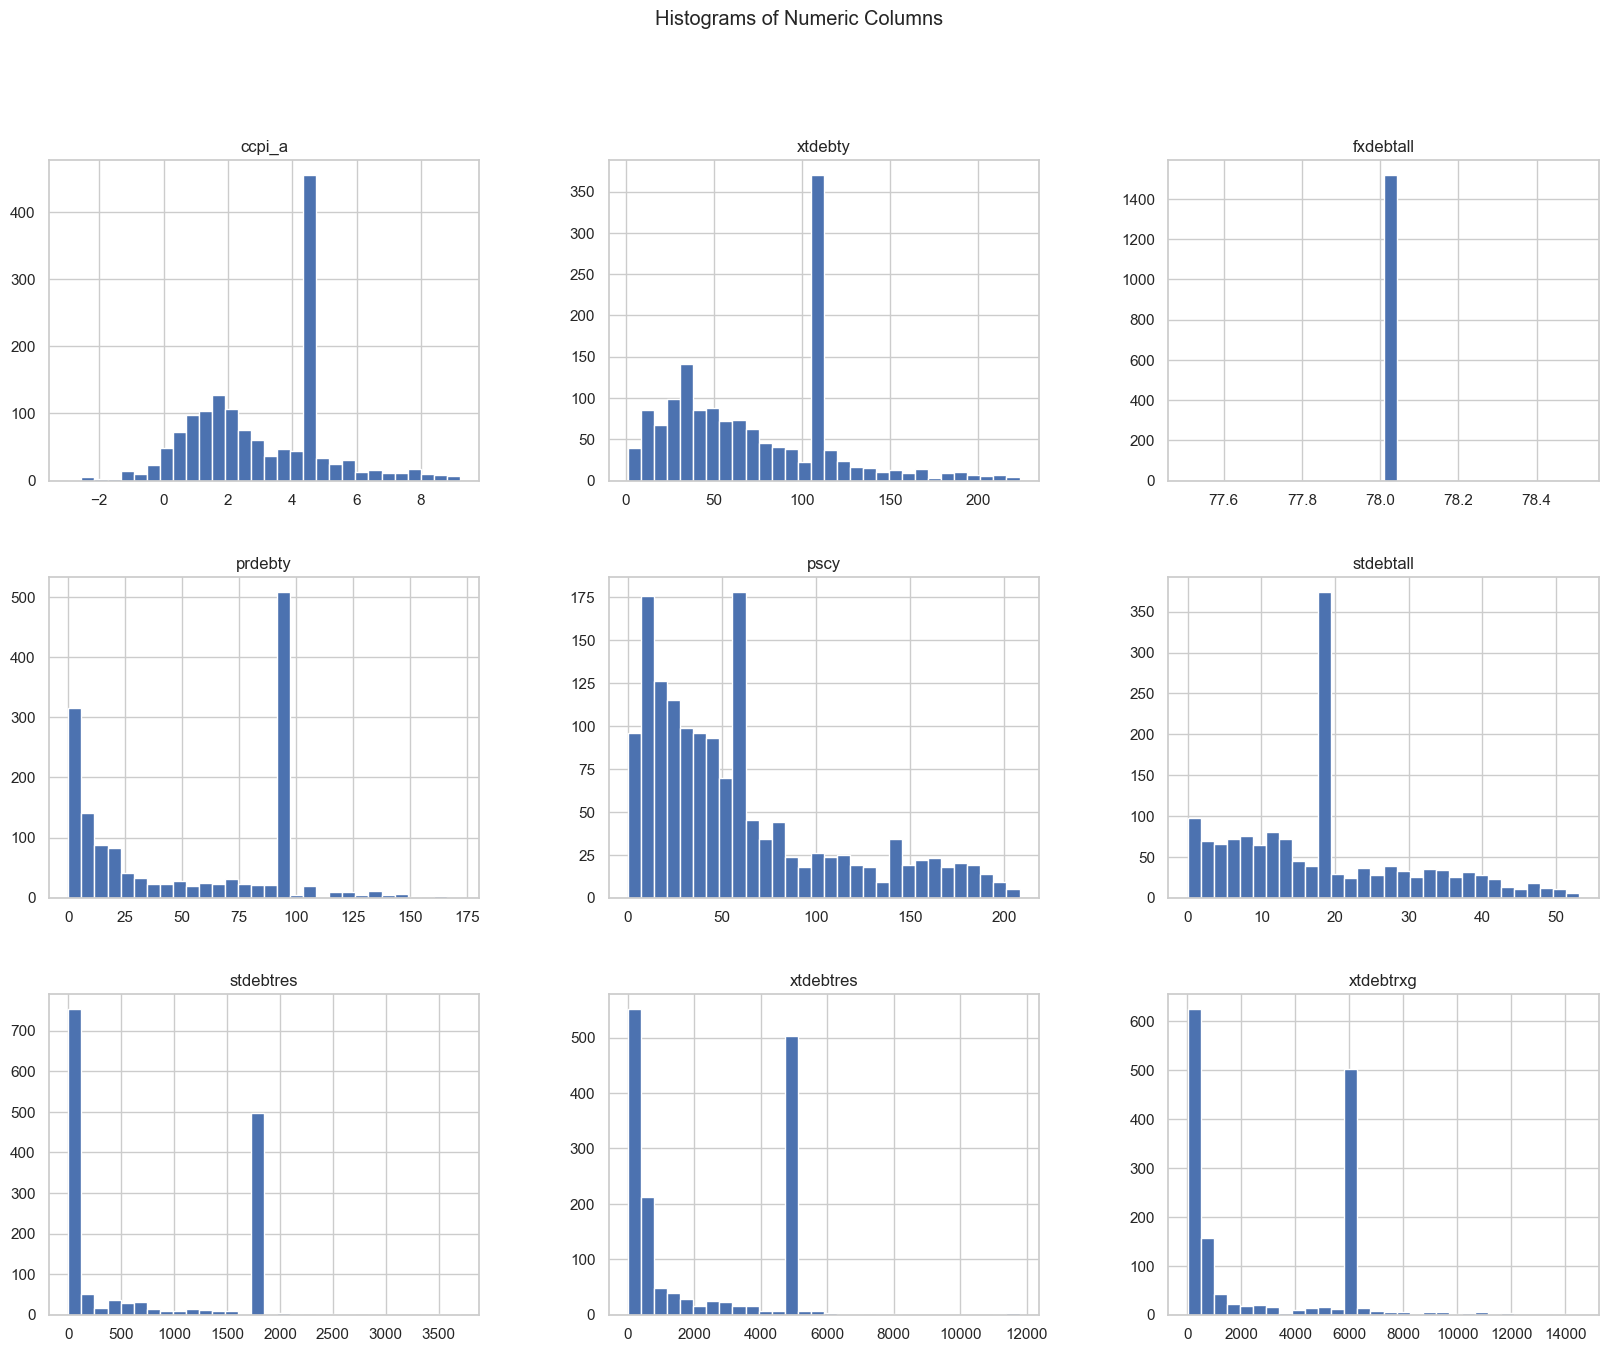

In [98]:
# Histograms
df_no_outliers.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

### Process Data Scaling 

In [99]:
# Z-score Standardization
scaler = StandardScaler()
df_standardized = df_no_outliers.copy()
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])


### Perform PCA for Feature Selection 

In [100]:
tmp = df_standardized.drop(columns="ccpi_a")
numeric_columns = tmp.select_dtypes(include=['float64', 'int64']).columns

In [101]:
# Unsupervised Feature Selection: PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
df_pca = pca.fit_transform(tmp[numeric_columns])
print(f"Number of principal components to retain 95% variance: {pca.n_components_}")

Number of principal components to retain 95% variance: 4


C:\Users\Meet\AppData\Local\Temp\ipykernel_4840\2986235715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')


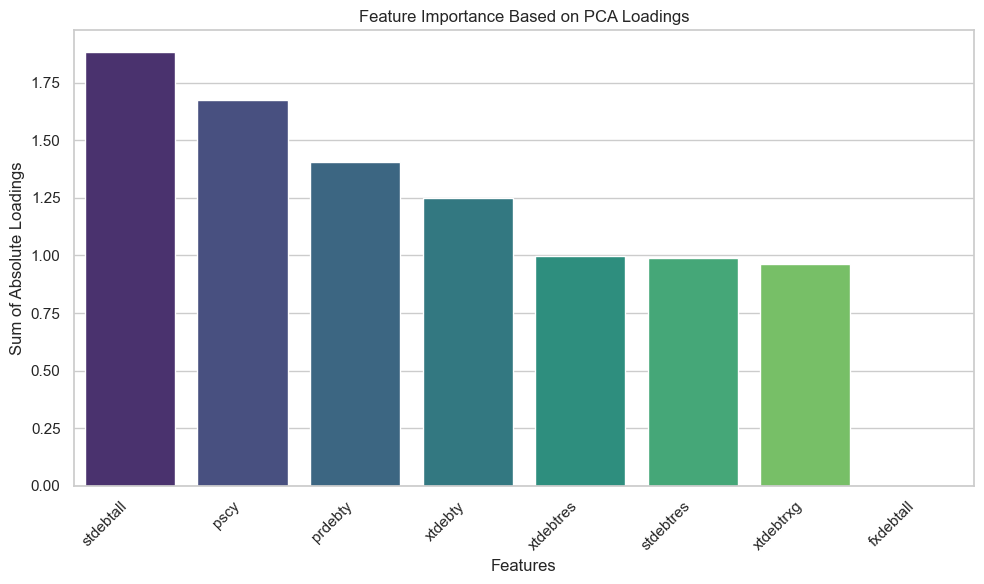

In [102]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_columns)
feature_importance = loadings.abs().sum(axis=1).sort_values(ascending=False)

# print("Most important features:")
# print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Loadings')
plt.tight_layout()
plt.show()

### Process Non-numeric column with Label Encoding

In [103]:
label_encoder = LabelEncoder()

for column in ['Country']:
    df_standardized[column] = label_encoder.fit_transform(df_standardized[column])

In [104]:
selected_feature_pca = ["stdebtall", "pscy", "prdebty", "xtdebty", "ccpi_a"]
df2 = df_standardized[selected_feature_pca]

In [105]:
X = df2.drop(columns=['ccpi_a'])
y = df2['ccpi_a']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Perform Feature Selection With Random Forest

In [106]:
# Feature selection using random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Select top N important features 
top_n = pca.n_components_
top_features = feature_importances.head(top_n)['Feature'].tolist()
print(f"Top {top_n} features: {top_features}")

     Feature  Importance
1       pscy    0.397379
3    xtdebty    0.219286
0  stdebtall    0.196114
2    prdebty    0.187221
Top 4 features: ['pscy', 'xtdebty', 'stdebtall', 'prdebty']


### Feature Selection With RFE

In [107]:
model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train, y_train)


feature_ranking = rfe.ranking_
feature_names = X.columns
rfe_features = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Select the top-ranked features
selected_features = rfe_features[rfe_features['Ranking'] == 1]['Feature'].tolist()
print(f"Selected features by RFE: {selected_features}")

Selected features by RFE: ['stdebtall', 'pscy', 'prdebty', 'xtdebty']


c:\Users\Meet\Desktop\Desktop Folders\Projects\Temp\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=8 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


### Train Regression Model with Auto Encoder 

c:\Users\Meet\Desktop\Desktop Folders\Projects\Temp\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.2899 - val_loss: 0.0458
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0100 - val_loss: 0.0023
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.2878e-04 - val_loss: 8.5059e-04
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.6074e-04 - val_loss: 0.0016
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7431e-04 - val_loss: 8.2322e-04
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4249e-04 - val_loss: 7.0242e-04
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.2319e-04 - val_loss: 6.9428e-04
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 

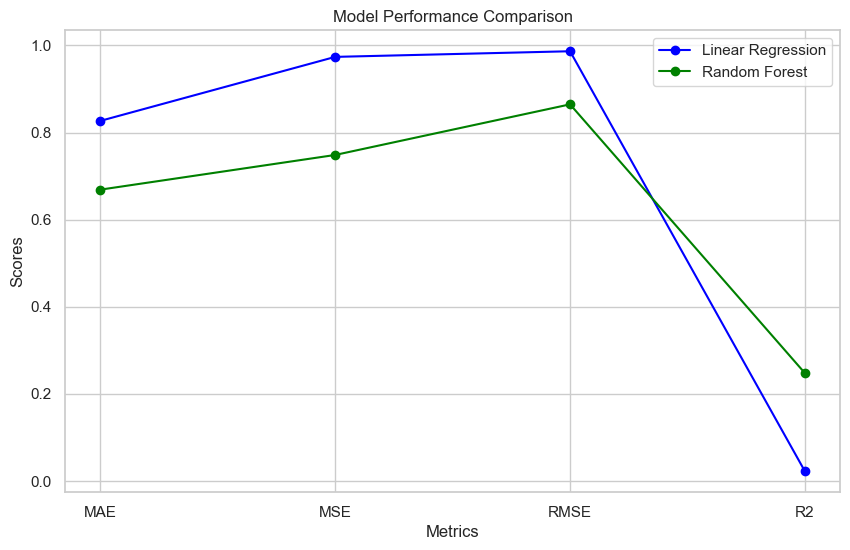

In [108]:
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

input_dim = X.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.fit(X, X, epochs=30, batch_size=16, validation_split=0.2)

# Encoder model to reduce dimensionality
encoder_model = Sequential()
for layer in autoencoder.layers[:3]:  # Using only the encoder part
    encoder_model.add(layer)
df_autoencoded = encoder_model.predict(X)

# Prepare the autoencoded data for regression
X_autoencoded = pd.DataFrame(df_autoencoded)


X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    mae_mean = -mae_scores.mean()
    mse_mean = -mse_scores.mean()
    rmse_mean = np.sqrt(-mse_scores).mean()
    r2_mean = r2_scores.mean()

    return mae_mean, mse_mean, rmse_mean, r2_mean

# Evaluate Linear Regression
lr_mae, lr_mse, lr_rmse, lr_r2 = evaluate_model(lr, X_autoencoded, y)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

# Evaluate Random Forest
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf, X_autoencoded, y)
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")


metrics = ['MAE', 'MSE', 'RMSE', 'R2']
lr_values = [lr_mae, lr_mse, lr_rmse, lr_r2]
rf_values = [rf_mae, rf_mse, rf_rmse, rf_r2]

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(metrics, lr_values, marker='o', label='Linear Regression', color='blue')
plt.plot(metrics, rf_values, marker='o', label='Random Forest', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

plt.grid(True)
plt.show()


### Perform P-Test for feature comparison

In [109]:
# pearsonr test for feature dependency comaprision 

infl_col = 'ccpi_a'
fiscal_col = ['xtdebty', 'fxdebtall', 'prdebty', 'pscy', 'stdebtall', 'stdebtres', 'xtdebtres', 'xtdebtrxg']
for feature in fiscal_col:
    corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])
    print(f'Pearson correlation coefficient between {infl_col} and {feature}: {corr}, p-value: {p_value}')


Pearson correlation coefficient between ccpi_a and xtdebty: -0.0702444941249736, p-value: 0.0061821547079357626
Pearson correlation coefficient between ccpi_a and fxdebtall: nan, p-value: nan
Pearson correlation coefficient between ccpi_a and prdebty: -0.025781911847666986, p-value: 0.31545485158029885
Pearson correlation coefficient between ccpi_a and pscy: 0.016409369538948938, p-value: 0.5229203083235197
Pearson correlation coefficient between ccpi_a and stdebtall: -0.04640854050949877, p-value: 0.07066383613175982
Pearson correlation coefficient between ccpi_a and stdebtres: 0.006036166756841464, p-value: 0.8142191042949517
Pearson correlation coefficient between ccpi_a and xtdebtres: -0.01083981325122717, p-value: 0.6730249533854206
Pearson correlation coefficient between ccpi_a and xtdebtrxg: -0.041012966567048004, p-value: 0.11020258719778825


C:\Users\Meet\AppData\Local\Temp\ipykernel_4840\3858607376.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])


### Test MIR for feature selection

In [110]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = df_standardized.drop(columns=['ccpi_a'])
y = df_standardized['ccpi_a']


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print(mi_df)

     Feature  Mutual Information
0    Country            0.411364
1       Year            0.116728
2    xtdebty            0.073318
3  fxdebtall            0.005037
4    prdebty            0.057402
5       pscy            0.080494
6  stdebtall            0.026227
7  stdebtres            0.051219
8  xtdebtres            0.020729
9  xtdebtrxg            0.057200


## Combine All Selected Features 

In [ ]:
# Here is selected features by EDA and features selection methods.

balance_sheet_features = ["Country", "Year", "concggd"]
gov_debt_features = ["dfggd", "pby", "ggdma"]
private_sec_debt_features = ["xtdebty", "prdebty", "pscy", "stdebtall"]

In [ ]:
balance_sheet_data = pd.read_csv("data/fiscal/balance_sheet_comp.csv")
gov_debt_data = pd.read_csv("data/fiscal/gov_debt_sus.csv")
private_sec_data = pd.read_csv("data/fiscal/private_sec_debt.csv")

### Filter Data with selected features

In [ ]:
balance_sheet_data = balance_sheet_data[balance_sheet_features]
gov_debt_data = gov_debt_data[gov_debt_features]
private_sec_data = private_sec_data[private_sec_debt_features]

### Merge all selected data into final Dataframe

In [ ]:
final_df = pd.concat([balance_sheet_data, gov_debt_data, private_sec_data], axis=1)

### Handle Missing Value

In [ ]:
df_filled = final_df.fillna(final_df.mean(numeric_only=True))

### Merge Dataframe with Inflation data on common Country Code and Year

In [ ]:
# Merging Dataframes
df_filled = pd.merge(inf_df, df_filled, on=['Country', 'Year'], how='inner')

### Perform IQR Method for handle Outlier

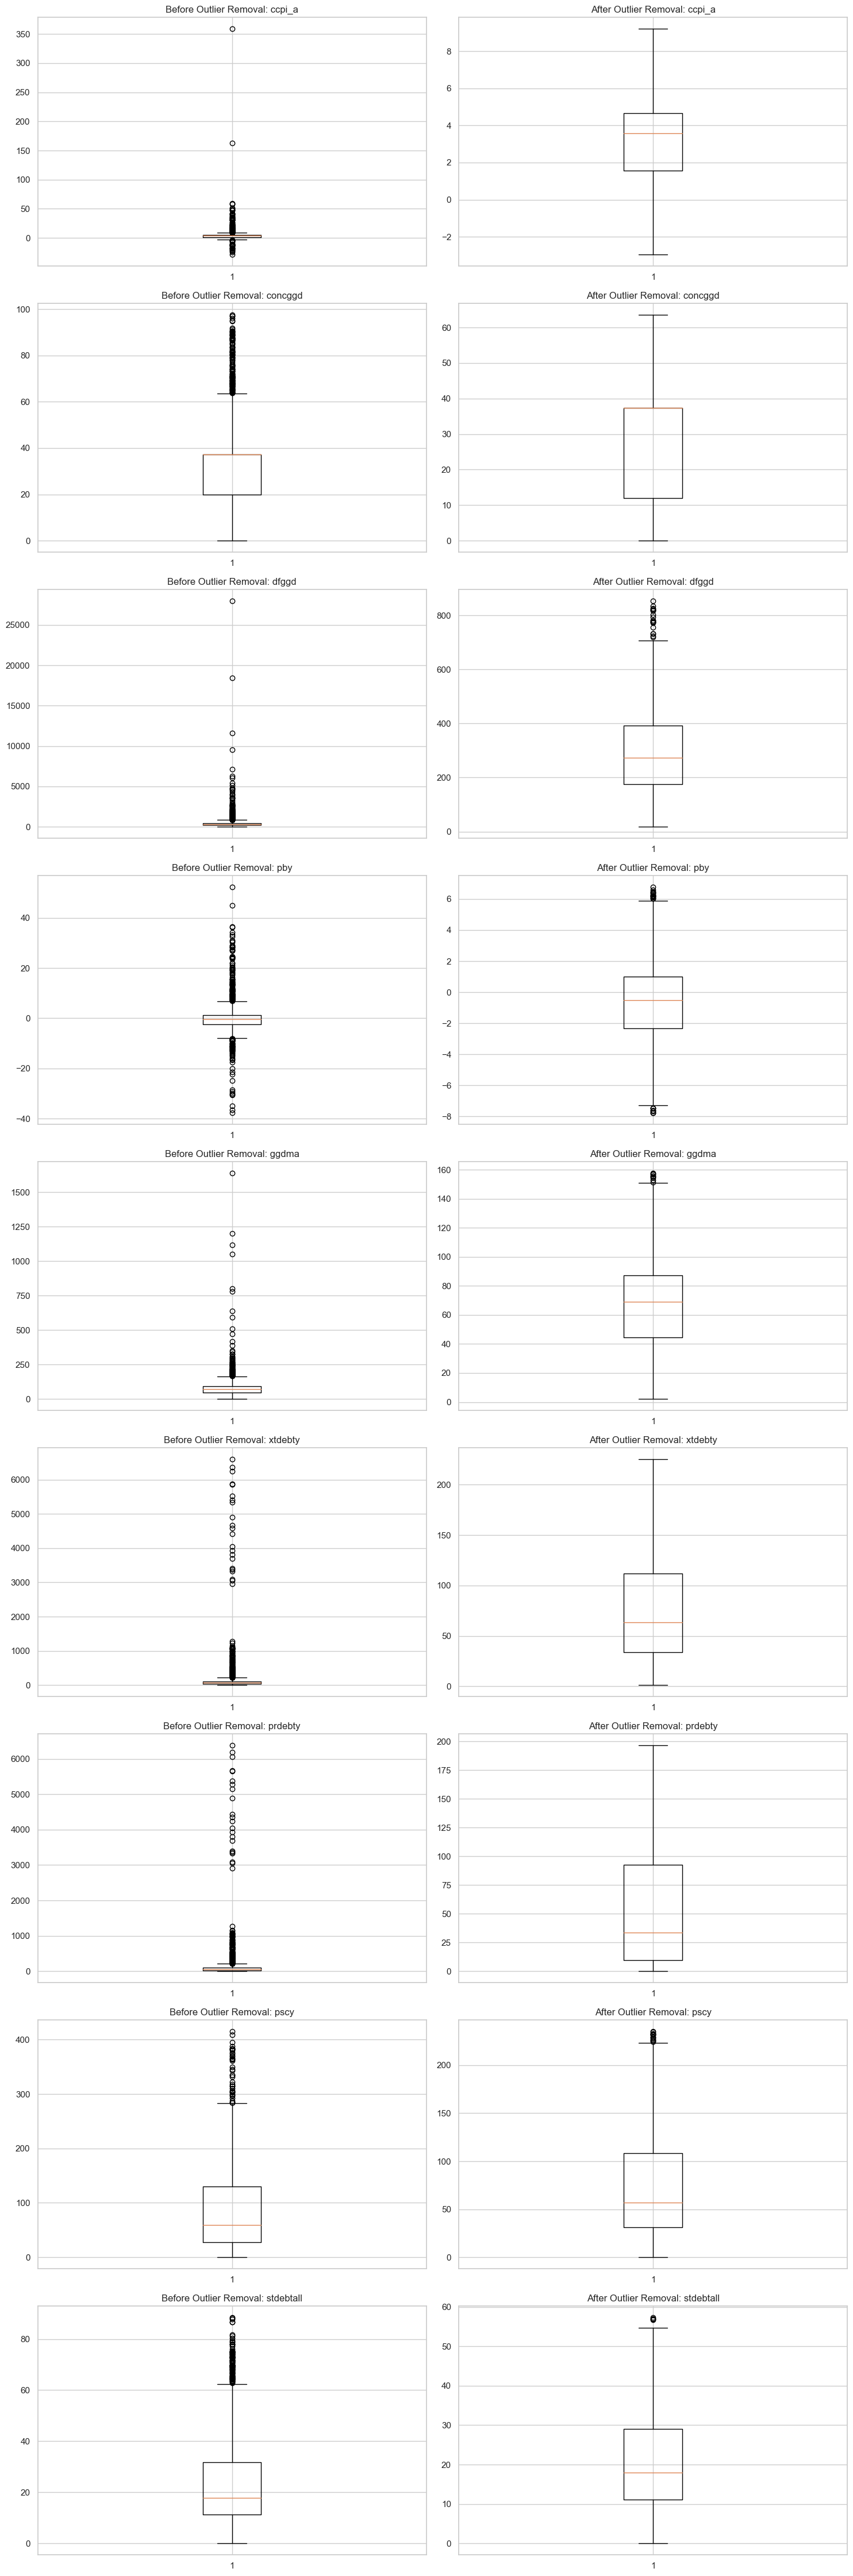

In [ ]:
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    df_no_outliers = df.copy()
    
    for col in numeric_columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

df_no_outliers = remove_outliers_iqr(df_filled)
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, len(numeric_columns)*5))

for i, col in enumerate(numeric_columns):
    # Box plot before removing outliers
    axes[i, 0].boxplot(df_filled[col].dropna())
    axes[i, 0].set_title(f'Before Outlier Removal: {col}')
    
    # Box plot after removing outliers
    axes[i, 1].boxplot(df_no_outliers[col].dropna())
    axes[i, 1].set_title(f'After Outlier Removal: {col}')

plt.tight_layout()
plt.show()


In [ ]:
duplicate_rows = df_no_outliers[df_no_outliers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Plot Histograms

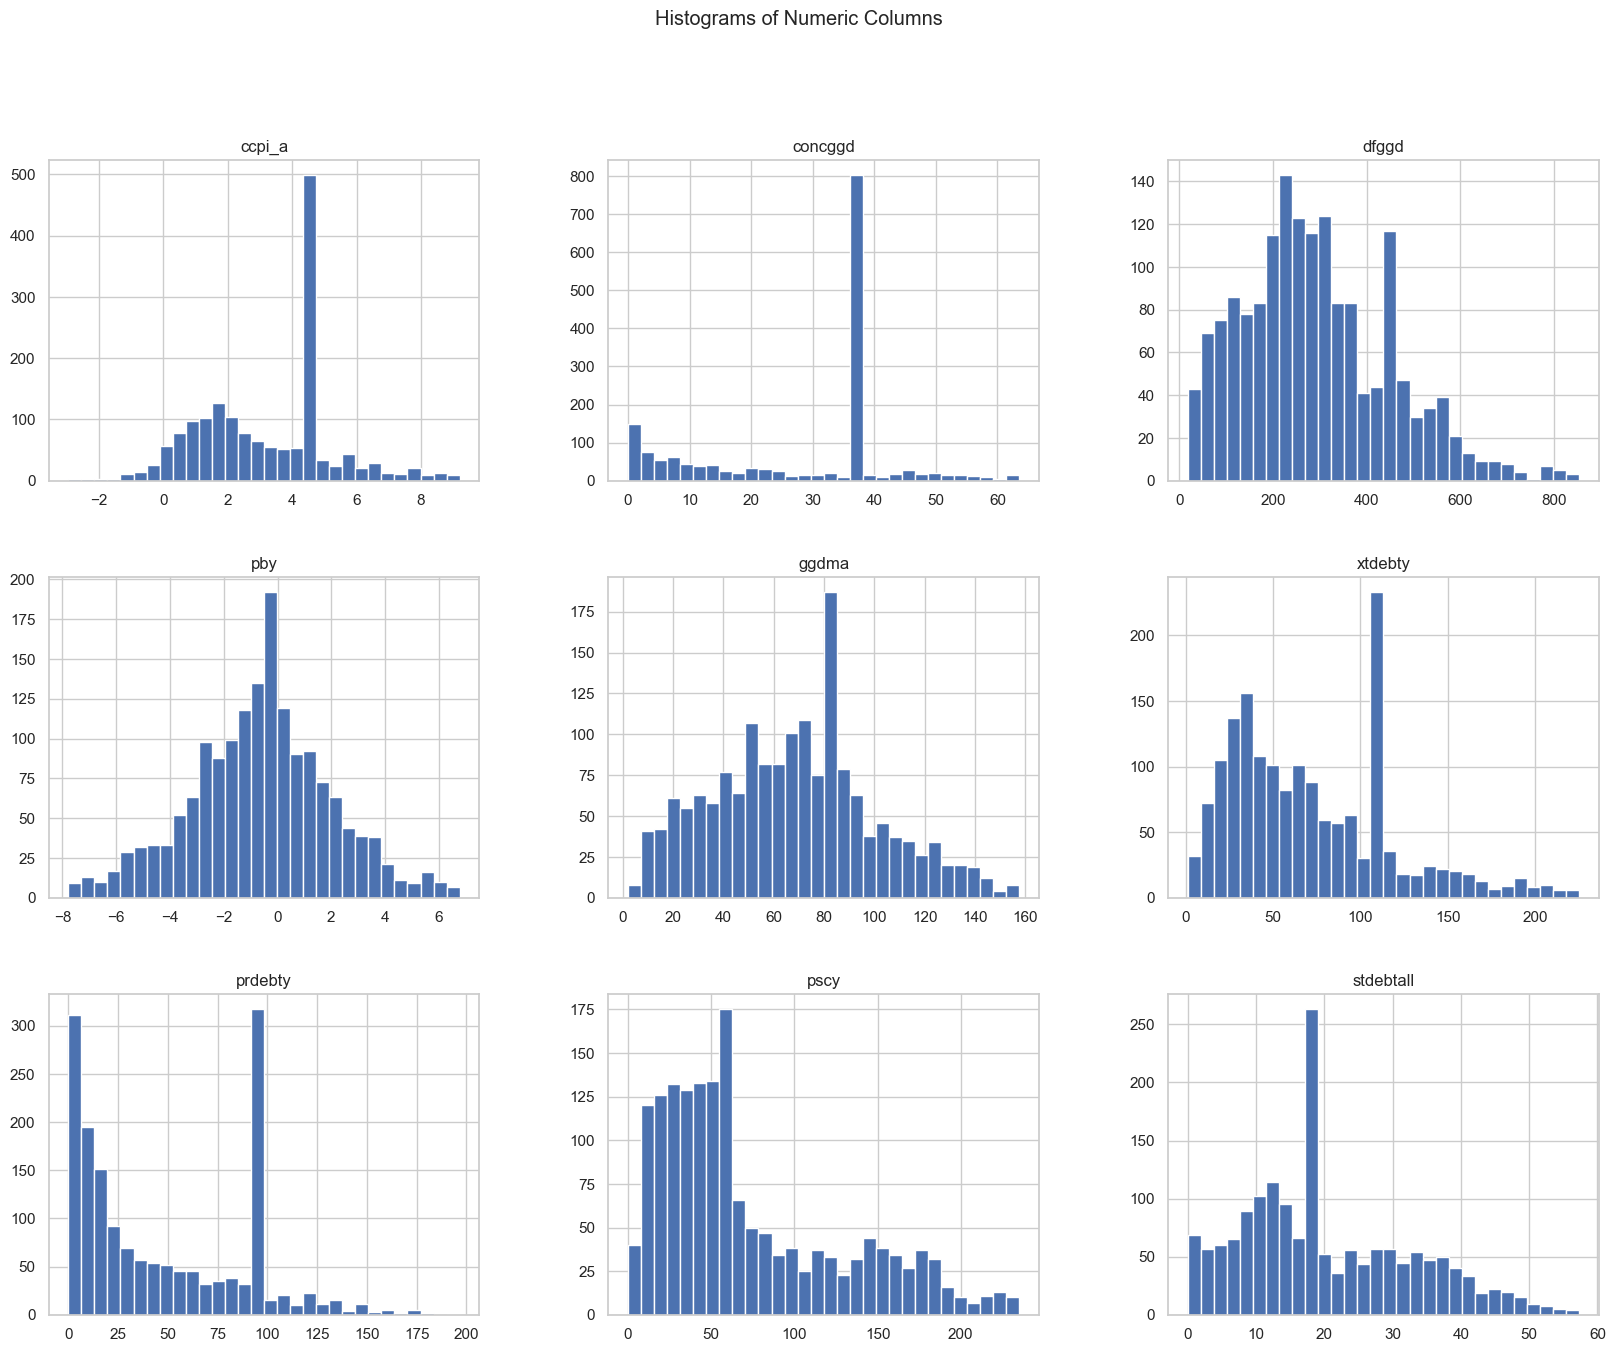

In [ ]:
# Histograms
df_no_outliers.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

### Perform Data scaling

In [ ]:
# Z-score Standardization
scaler = StandardScaler()
df_standardized = df_no_outliers.copy()
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])


### Run PCA for feature importance

In [ ]:
tmp = df_standardized.drop(columns="ccpi_a")
numeric_columns = tmp.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Unsupervised Feature Selection: PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
df_pca = pca.fit_transform(tmp[numeric_columns])
print(f"Number of principal components to retain 95% variance: {pca.n_components_}")

Number of principal components to retain 95% variance: 7


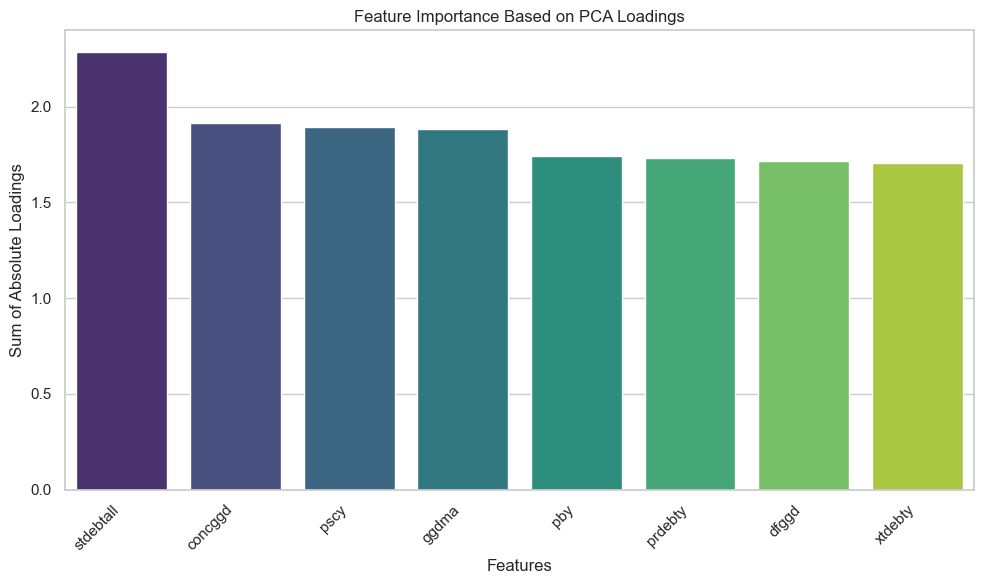

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_columns)
feature_importance = loadings.abs().sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Loadings')
plt.tight_layout()
plt.show()

### Use Label Encoding for Non-numeric columns

In [ ]:
label_encoder = LabelEncoder()

for column in ['Country']:
    df_standardized[column] = label_encoder.fit_transform(df_standardized[column])

In [ ]:
selected_feature_pca = ["stdebtall", "concggd", "pscy", "ggdma", "pby", "ccpi_a"]
df2 = df_standardized[selected_feature_pca]

In [ ]:
X = df2.drop(columns=['ccpi_a'])
y = df2['ccpi_a']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Perform feature Selection using Random Forest

In [ ]:
# Feature selection using random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Select top N important features 
top_n = pca.n_components_
top_features = feature_importances.head(top_n)['Feature'].tolist()
print(f"Top {top_n} features: {top_features}")

     Feature  Importance
2       pscy    0.253037
0  stdebtall    0.227551
3      ggdma    0.215745
4        pby    0.163333
1    concggd    0.140334
Top 7 features: ['pscy', 'stdebtall', 'ggdma', 'pby', 'concggd']


### Feature Selection Using RFE Method

In [ ]:
model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train, y_train)


feature_ranking = rfe.ranking_
feature_names = X.columns
rfe_features = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Select the top-ranked features
selected_features = rfe_features[rfe_features['Ranking'] == 1]['Feature'].tolist()
print(f"Selected features by RFE: {selected_features}")

Selected features by RFE: ['stdebtall', 'concggd', 'pscy', 'ggdma', 'pby']


### Train Regression Models with Auto Encoder

C:\Users\Meet\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.6352 - val_loss: 0.0143
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - val_loss: 0.0053
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 10/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 11/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 12/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_l

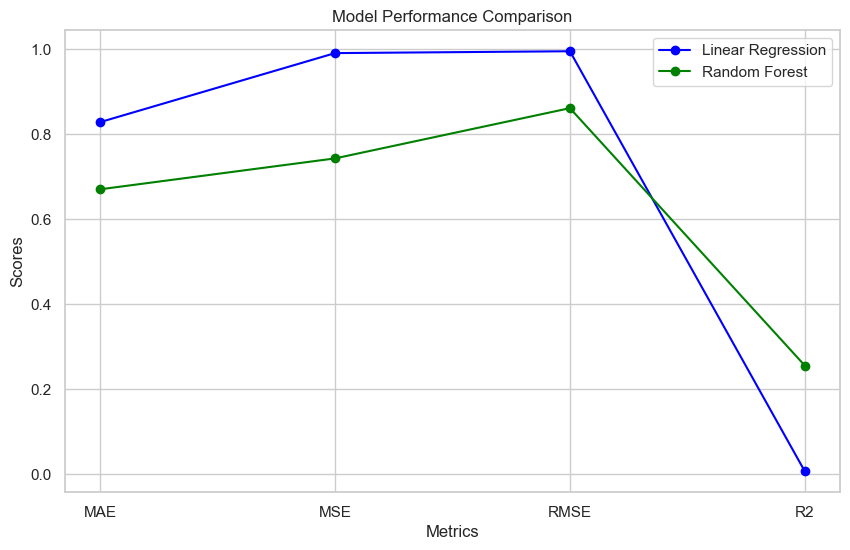

In [ ]:
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

input_dim = X.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.fit(X, X, epochs=30, batch_size=16, validation_split=0.2)

# Encoder model to reduce dimensionality
encoder_model = Sequential()
for layer in autoencoder.layers[:3]:  # Using only the encoder part
    encoder_model.add(layer)
df_autoencoded = encoder_model.predict(X)

# Prepare the autoencoded data for regression
X_autoencoded = pd.DataFrame(df_autoencoded)


X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    mae_mean = -mae_scores.mean()
    mse_mean = -mse_scores.mean()
    rmse_mean = np.sqrt(-mse_scores).mean()
    r2_mean = r2_scores.mean()

    return mae_mean, mse_mean, rmse_mean, r2_mean

# Evaluate Linear Regression
lr_mae, lr_mse, lr_rmse, lr_r2 = evaluate_model(lr, X_autoencoded, y)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

# Evaluate Random Forest
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf, X_autoencoded, y)
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")




metrics = ['MAE', 'MSE', 'RMSE', 'R2']
lr_values = [lr_mae, lr_mse, lr_rmse, lr_r2]
rf_values = [rf_mae, rf_mse, rf_rmse, rf_r2]

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(metrics, lr_values, marker='o', label='Linear Regression', color='blue')
plt.plot(metrics, rf_values, marker='o', label='Random Forest', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

plt.grid(True)
plt.show()

### Run P-Test for feature comparison

In [ ]:
# pearsonr test for feature dependency comaprision 

infl_col = 'ccpi_a'
fiscal_col = ['concggd', 'dfggd', 'pby', 'ggdma', 'xtdebty', 'prdebty', 'pscy', 'stdebtall']
for feature in fiscal_col:
    corr, p_value = pearsonr(df_standardized[infl_col], df_standardized[feature])
    print(f'Pearson correlation coefficient between {infl_col} and {feature}: {corr}, p-value: {p_value}')


Pearson correlation coefficient between ccpi_a and concggd: 0.030740738210715615, p-value: 0.21159957001303267
Pearson correlation coefficient between ccpi_a and dfggd: 0.06635328961851927, p-value: 0.006961797841582313
Pearson correlation coefficient between ccpi_a and pby: 0.05542766761020775, p-value: 0.02422410388650579
Pearson correlation coefficient between ccpi_a and ggdma: 0.12793159910666374, p-value: 1.8003648604811436e-07
Pearson correlation coefficient between ccpi_a and xtdebty: -0.1364127542016865, p-value: 2.5768255195317885e-08
Pearson correlation coefficient between ccpi_a and prdebty: -0.09790238064474525, p-value: 6.691483114395557e-05
Pearson correlation coefficient between ccpi_a and pscy: 0.019507920764109926, p-value: 0.42800450928093614
Pearson correlation coefficient between ccpi_a and stdebtall: -0.021182799079293827, p-value: 0.3894163422928219


### Run MIR for feature comparison

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = df_standardized.drop(columns=['ccpi_a'])
y = df_standardized['ccpi_a']


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print(mi_df)

     Feature  Mutual Information
0    Country            0.393076
1       Year            0.098531
2    concggd            0.027580
3      dfggd            0.064125
4        pby            0.001411
5      ggdma            0.062217
6    xtdebty            0.093591
7    prdebty            0.067712
8       pscy            0.059096
9  stdebtall            0.049714
